# PRACTICA IAA CHIRRHOSIS
## ROGER BAIGES


#### IMPORT NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt


## LOAD THE DATASET

In [2]:
# Load the data and read the most basic features

from ucimlrepo import fetch_ucirepo 

# Necessary code to avoid SSL error
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

# fetch dataset 
cirrhosis_patient_survival_prediction = fetch_ucirepo(id=878) 
  
# data (as pandas dataframes) 
data = cirrhosis_patient_survival_prediction.data.original 
y = cirrhosis_patient_survival_prediction.data.targets # target variable

# metadata 
print(cirrhosis_patient_survival_prediction.metadata) 
  
# variable information 
print(cirrhosis_patient_survival_prediction.variables)

data.to_csv('cirrhosis_patient_survival_prediction.csv', index=False)

print('Data head:')
data.head()


{'uci_id': 878, 'name': 'Cirrhosis Patient Survival Prediction', 'repository_url': 'https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1', 'data_url': 'https://archive.ics.uci.edu/static/public/878/data.csv', 'abstract': 'Utilize 17 clinical features for predicting survival state of patients with liver cirrhosis. The survival states include 0 = D (death), 1 = C (censored), 2 = CL (censored due to liver transplantation).', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 418, 'num_features': 17, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Age', 'Sex'], 'target_col': ['Status'], 'index_col': ['ID'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5R02G', 'creators': ['E. Dickson', 'P. Grambsch', 'T. Fleming', 'L. Fisher', 'A. Langworthy'], 'intro_paper': {'title': 'Prognos

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261,2.60,156,1718.0,137.95,172,190,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302,4.14,54,7394.8,113.52,88,221,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176,3.48,210,516.0,96.10,55,151,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244,2.54,64,6121.8,60.63,92,183,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279,3.53,143,671.0,113.15,72,136,10.9,3.0


# PREPROCESSING

In [3]:
# Data preprocessing

# Replace missing values with NA (interpretable for Pandas)
data.replace(to_replace=['NaNN', '', np.nan], value=np.nan, inplace=True)

# Improve the readability of the data
target_class_mapping = {'C': 'Alive', 'D': 'Dead', 'CL': 'Liver Transplant'}
data['Status'] = data['Status'].replace(target_class_mapping)

# Saving the dataset
data.to_csv('../assets/data/cirrhosis.csv', index=False)
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,Dead,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261,2.60,156,1718.0,137.95,172,190,12.2,4.0
1,2,4500,Alive,D-penicillamine,20617,F,N,Y,Y,N,1.1,302,4.14,54,7394.8,113.52,88,221,10.6,3.0
2,3,1012,Dead,D-penicillamine,25594,M,N,N,N,S,1.4,176,3.48,210,516.0,96.10,55,151,12.0,4.0
3,4,1925,Dead,D-penicillamine,19994,F,N,Y,Y,S,1.8,244,2.54,64,6121.8,60.63,92,183,10.3,4.0
4,5,1504,Liver Transplant,Placebo,13918,F,N,Y,Y,N,3.4,279,3.53,143,671.0,113.15,72,136,10.9,3.0


In [4]:
# Change the type of the columns to numeric
columns_to_change = ['Cholesterol', 'Tryglicerides', 'Copper', 'Platelets', 'Prothrombin', 'Alk_Phos', 'SGOT', 'Albumin']
data[columns_to_change] = data[columns_to_change].apply(pd.to_numeric, errors='coerce')

# Change the variable Stage to categorical
data['Stage'] = data['Stage'].astype('category')

data.dtypes

ID                  int64
N_Days              int64
Status             object
Drug               object
Age                 int64
Sex                object
Ascites            object
Hepatomegaly       object
Spiders            object
Edema              object
Bilirubin         float64
Cholesterol       float64
Albumin           float64
Copper            float64
Alk_Phos          float64
SGOT              float64
Tryglicerides     float64
Platelets         float64
Prothrombin       float64
Stage            category
dtype: object

In [5]:
# Check if there are duplicated rows

duplicate_rows = [data.duplicated()]
duplicated = False
for element in duplicate_rows[0]:
    if element == True:
        duplicated = True
        break
print(f'Duplicated Rows: {duplicated}')

Duplicated Rows: False


## Analizing the dataset

In [6]:
print(data.shape)
data.describe()

(418, 20)


,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000


In [7]:
# Classifying the features in numerica and categorical

numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns.drop('ID')
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

for col in categorical_columns:
    data[col] = pd.Categorical(data[col])

data.dtypes

ID                  int64
N_Days              int64
Status           category
Drug             category
Age                 int64
Sex              category
Ascites          category
Hepatomegaly     category
Spiders          category
Edema            category
Bilirubin         float64
Cholesterol       float64
Albumin           float64
Copper            float64
Alk_Phos          float64
SGOT              float64
Tryglicerides     float64
Platelets         float64
Prothrombin       float64
Stage            category
dtype: object

# Numeric variables

### Saving plots of the data distributions

In [8]:
sns.set(style="whitegrid")

# Function to save plots
def save_plot(type, variable, data):
    plt.figure(figsize=(6, 4))
    getattr(sns, type)(data[variable])
    plt.title(f"{variable} - {type}")
    plt.tight_layout()
    plt.savefig(f"../images/{variable}_{type}.png")
    plt.close()

# Create and save histograms and boxplots for each numeric column
for plot_type in ['histplot', 'boxplot']:
    for col in numeric_columns:
        save_plot(plot_type, col, data)

### Visualization of the images

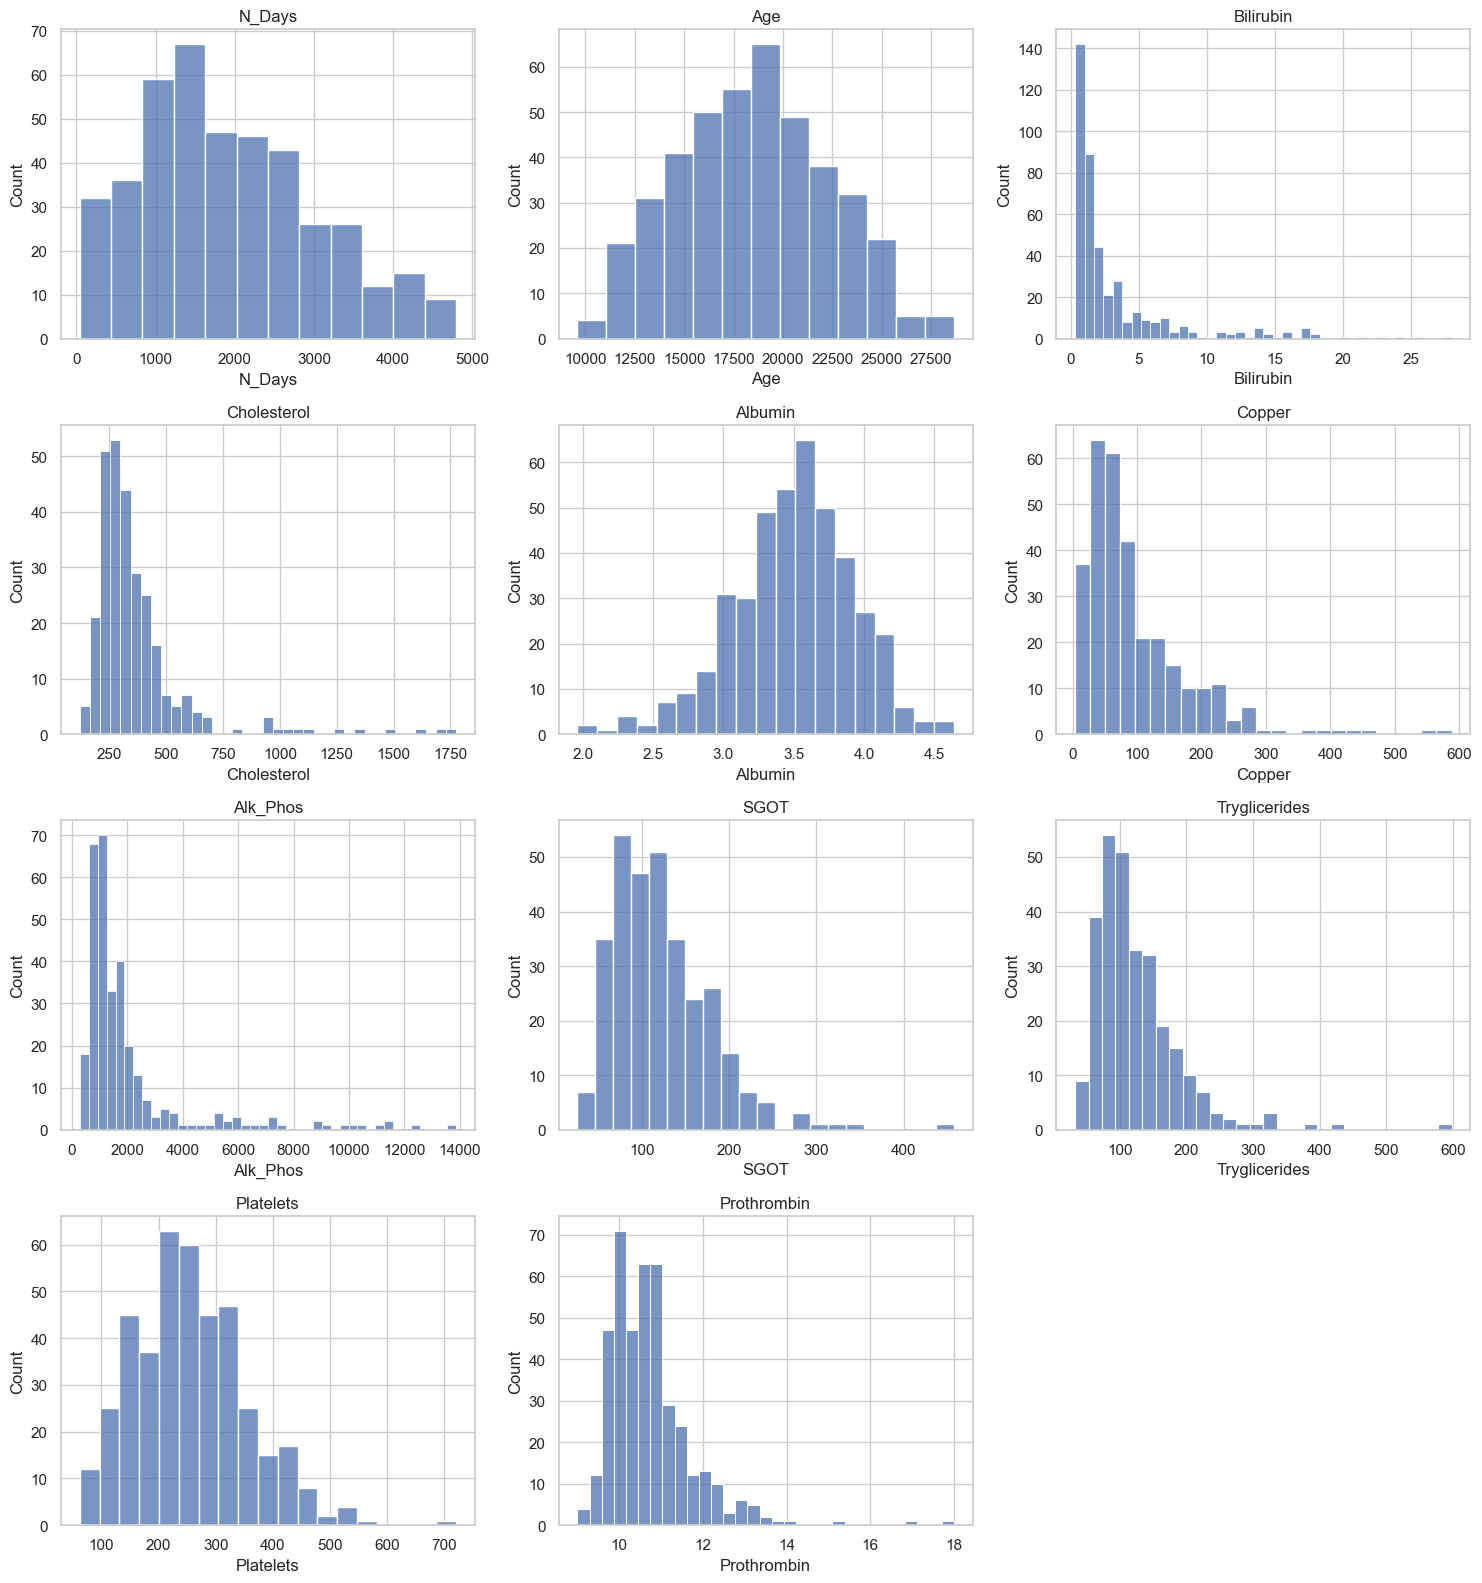

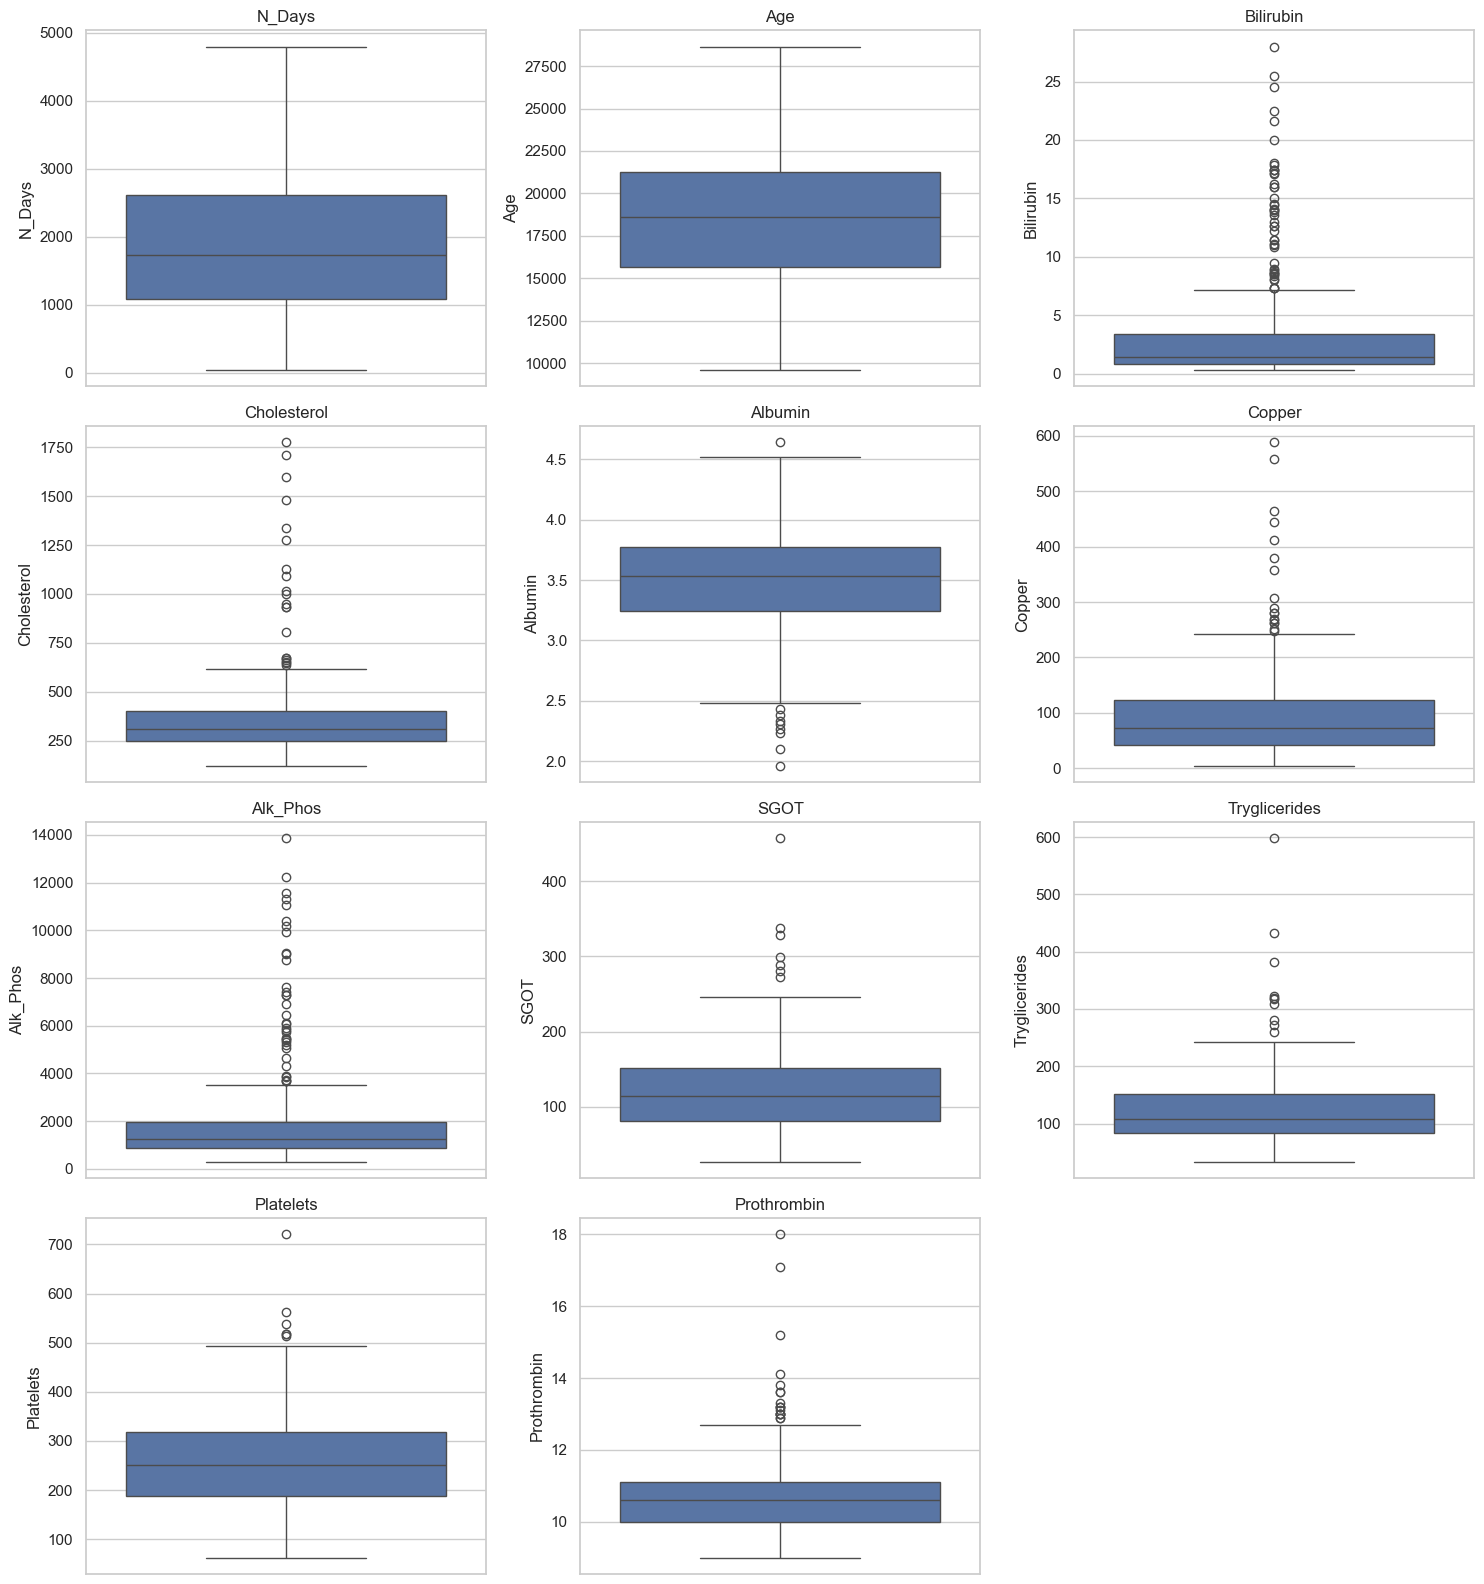

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration of the graphic styles
sns.set(style="whitegrid")

# Creating histograms and boxplots for each numeric column
n_rows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)

for element in ['histplot', 'boxplot']:
    plt.figure(figsize=(15, 4 * n_rows))
    for i, col in enumerate(numeric_columns):
        plt.subplot(n_rows, 3, i + 1)
        getattr(sns, element)(data[col])
        plt.title(col)

    plt.tight_layout()
    plt.show()

# Check distribution

In [10]:
import numpy as np
from scipy.stats import lognorm, kstest, normaltest, skew, kurtosis

def evaluate_distribution(column_data):
    """
    Extended evaluation of a variable's distribution, including tests for different distributions,
    and measures of skewness and kurtosis.
    """
    data_clean = column_data.dropna()

    # Dictionary to store p-values from different tests
    p_values = {}

    # Test for normal distribution
    _, p_normal = normaltest(data_clean)
    p_values['Normal'] = p_normal

    # Test for exponential distribution
    _, p_expon = kstest(data_clean, 'expon', args=(np.min(data_clean), np.std(data_clean)))
    p_values['Exponential'] = p_expon

    # Test for log-normal distribution
    _, p_lognorm = kstest(data_clean, 'lognorm', args=lognorm.fit(data_clean, floc=0))
    p_values['Log-Normal'] = p_lognorm

    # Test for Poisson distribution (approximation)
    if np.all(data_clean % 1 == 0):  # Check if all values are integers
        lambda_poisson = np.mean(data_clean)
        _, p_poisson = kstest(data_clean, 'poisson', args=(lambda_poisson,))
        p_values['Poisson'] = p_poisson
    else:
        p_values['Poisson'] = np.nan

    # Calculate skewness and kurtosis
    skewness = skew(data_clean) # Positive: right-skewed; negative: left-skewed
    kurt = kurtosis(data_clean) # Positive: heavy-tailed; negative: light-tailed

    # Determine the most probable distribution based on the highest p-value
    probable_distribution = max(p_values, key=p_values.get)
    if p_values[probable_distribution] < 0.05:
        probable_distribution = "None"

    return {
        'P-Values': p_values, 
        'Probable Distribution': probable_distribution,
        'Skewness': skewness,
        'Kurtosis': kurt
    }

# Apply the extended evaluation to each numerical variable
distribution_analysis_extended = {}
for variable in numeric_columns:
    distribution_analysis_extended[variable] = evaluate_distribution(data[variable])

distribution_analysis_extended


{'N_Days': {'P-Values': {'Normal': 2.3965085532341736e-05,
   'Exponential': 1.6442290368216018e-53,
   'Log-Normal': 5.496338420882902e-05,
   'Poisson': 1.0621766236161328e-107},
  'Probable Distribution': 'None',
  'Skewness': 0.47090441693552926,
  'Kurtosis': -0.4907107143713749},
 'Age': {'P-Values': {'Normal': 0.0007847868918447134,
   'Exponential': 3.380434783583058e-127,
   'Log-Normal': 0.09606411503413093,
   'Poisson': 3.0289017516983252e-87},
  'Probable Distribution': 'Log-Normal',
  'Skewness': 0.08653818165415915,
  'Kurtosis': -0.6236974528152954},
 'Bilirubin': {'P-Values': {'Normal': 4.018403412610257e-56,
   'Exponential': 5.870945295139583e-34,
   'Log-Normal': 2.1669894252167716e-05,
   'Poisson': nan},
  'Probable Distribution': 'None',
  'Skewness': 2.7078487798071555,
  'Kurtosis': 7.954863135239499},
 'Cholesterol': {'P-Values': {'Normal': 6.200042502819522e-51,
   'Exponential': 3.269419851708473e-14,
   'Log-Normal': 0.03148225722423481,
   'Poisson': 1.191

# Categorical variables

### Saving a single barplots image for all the categorical variables

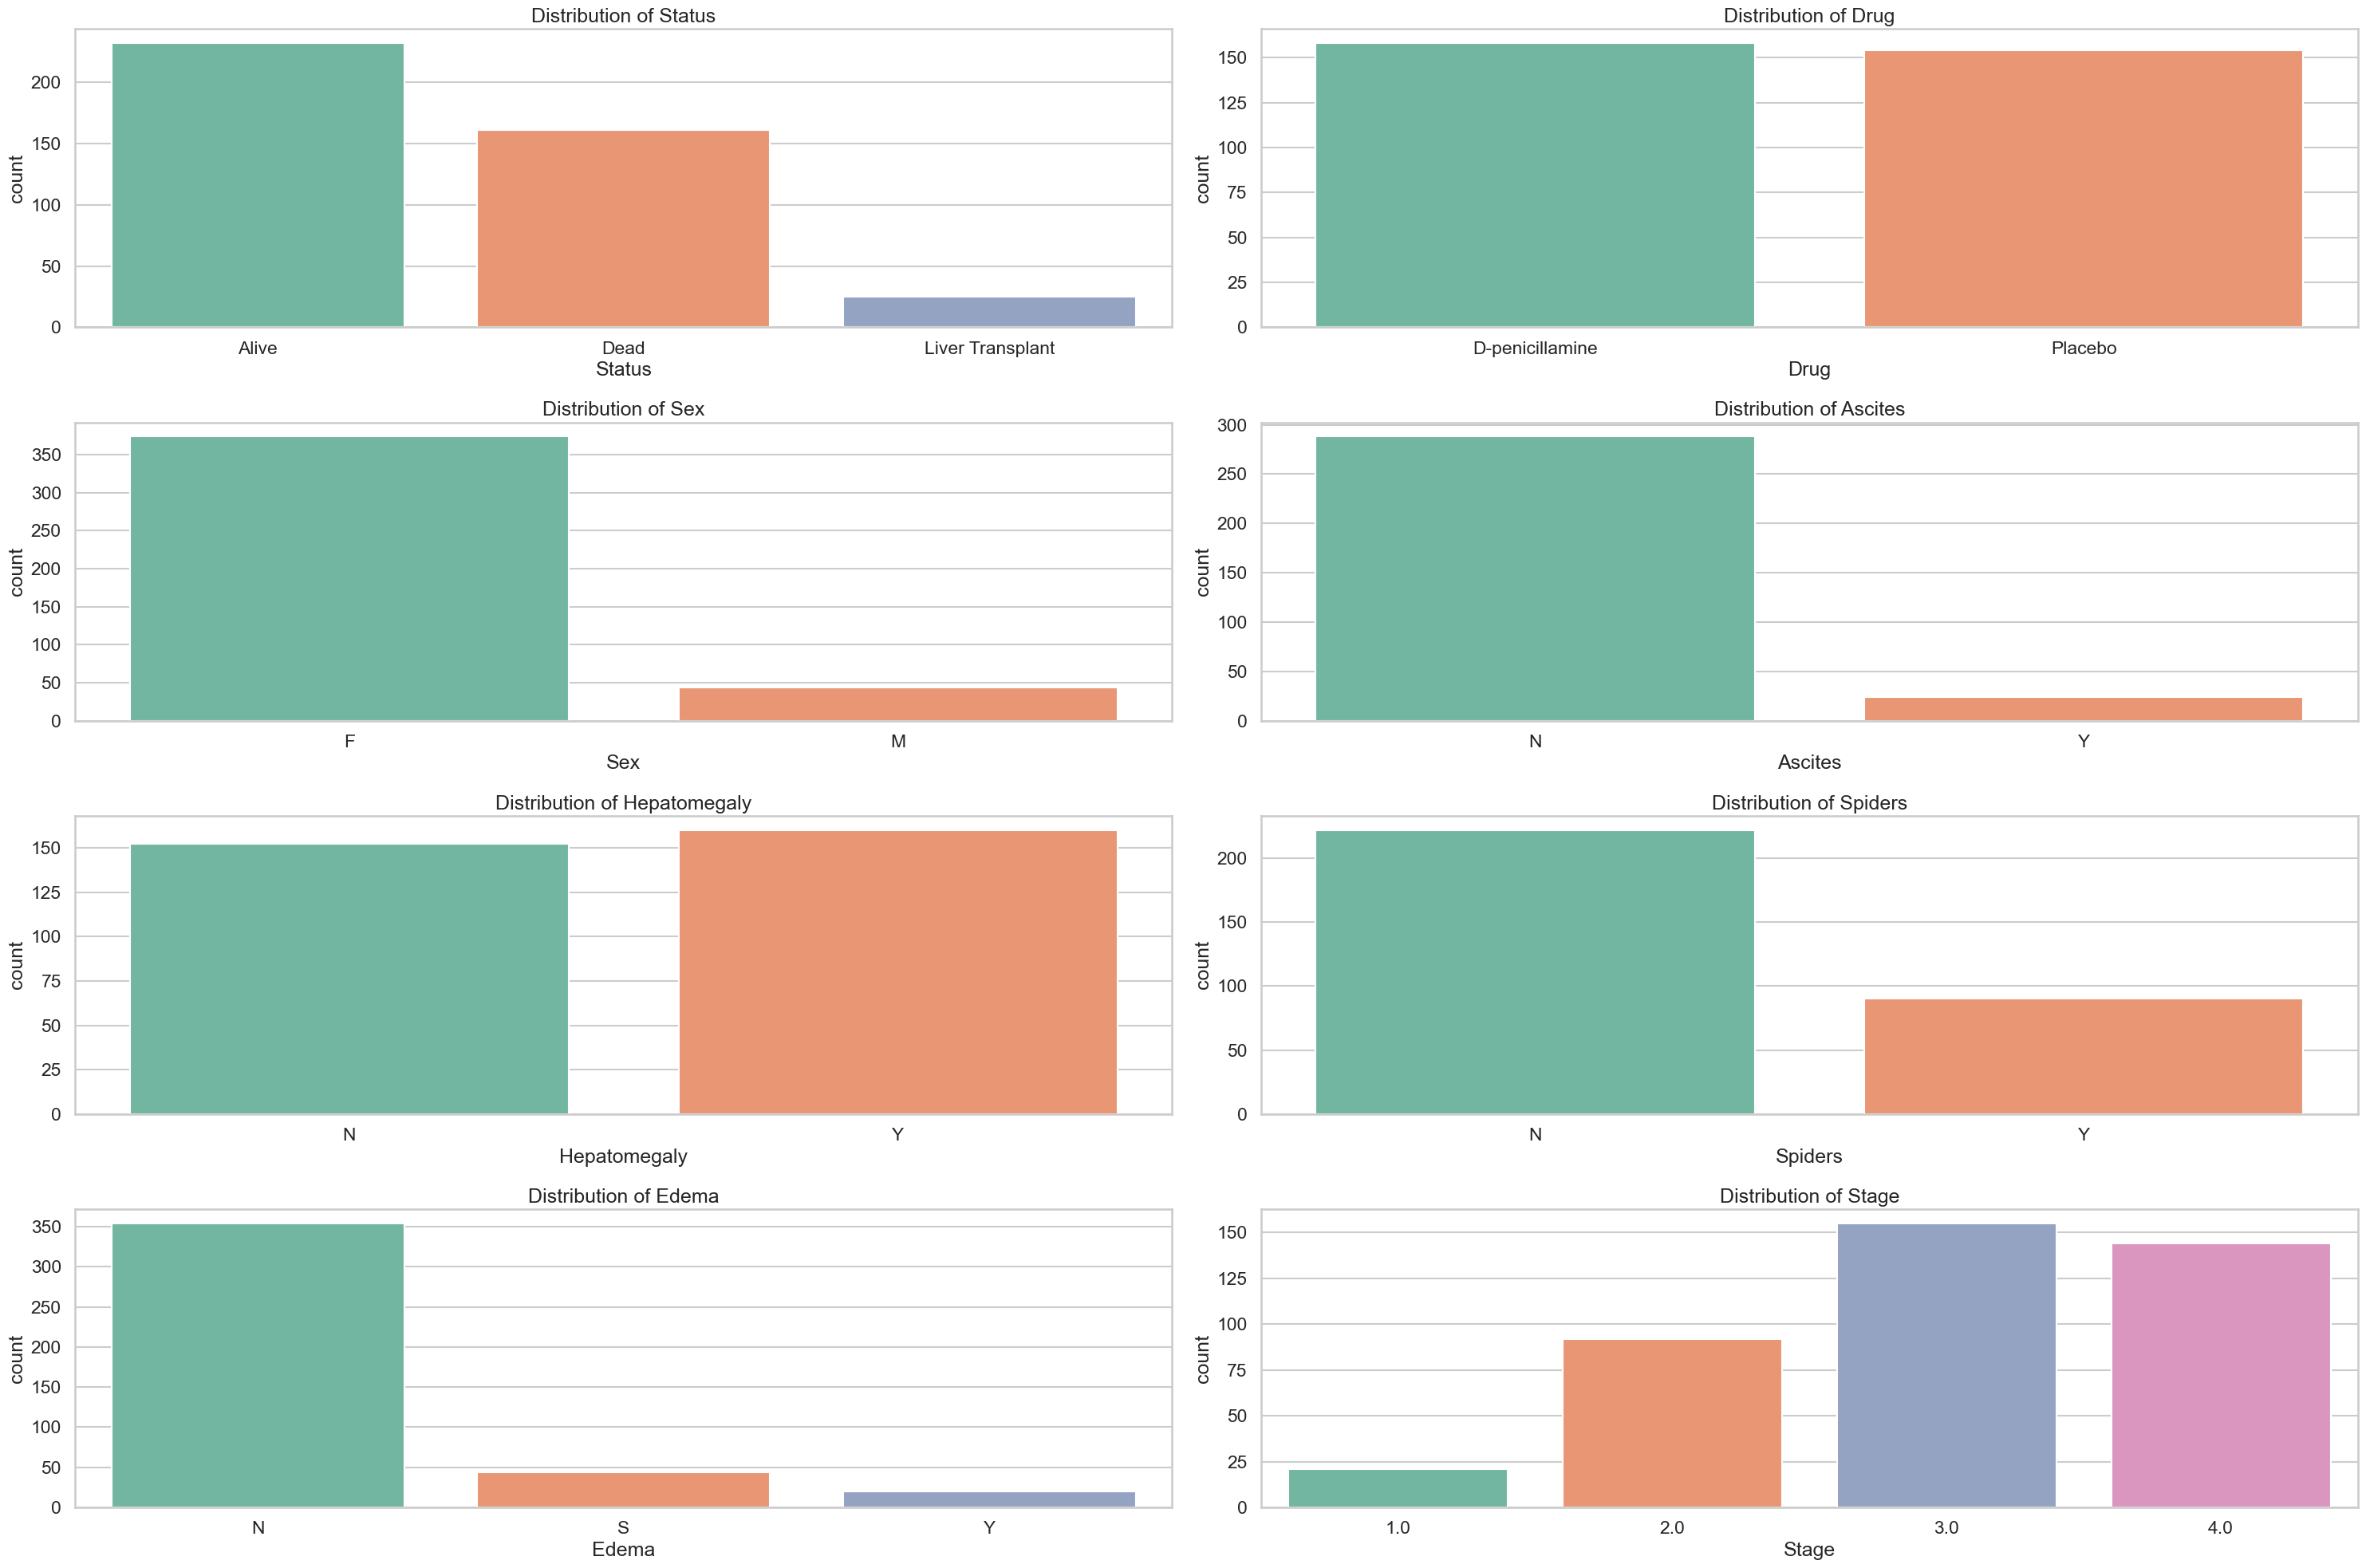

In [11]:
# Set the style for the seaborn plots
sns.set(style="whitegrid")
sns.set_context("talk")  # This sets the context to "talk", which is suitable for presentations


# Determine the layout of the subplots based on the number of categorical columns
# For example, if you want 2 plots per row
plots_per_row = 2
n_rows = (len(categorical_columns) + plots_per_row - 1) // plots_per_row

# Set the size of the overall figure
fig, axes = plt.subplots(n_rows, plots_per_row, figsize=(15 * plots_per_row, 5 * n_rows))

# If there's only one row, the axes array is not 2D which can cause issues during indexing
if n_rows == 1:
    axes = [axes]

# Loop through the list of categorical columns and create a bar plot for each
for i, column in enumerate(categorical_columns):
    # Calculate the row and column index for the current plot
    row = i // plots_per_row
    col = i % plots_per_row
    ax = axes[row] if n_rows == 1 else axes[row, col]
    sns.countplot(data=data, x=column, hue=column, palette="Set2", ax=ax, legend=False)
    ax.set_title(f'Distribution of {column}')
    # No need to remove the legend as we've set legend=False

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure as a .png file
plt.savefig('../images/categorical_columns_barplots.png')

# Show the plot
plt.show()

### Visualizing all the image one by one

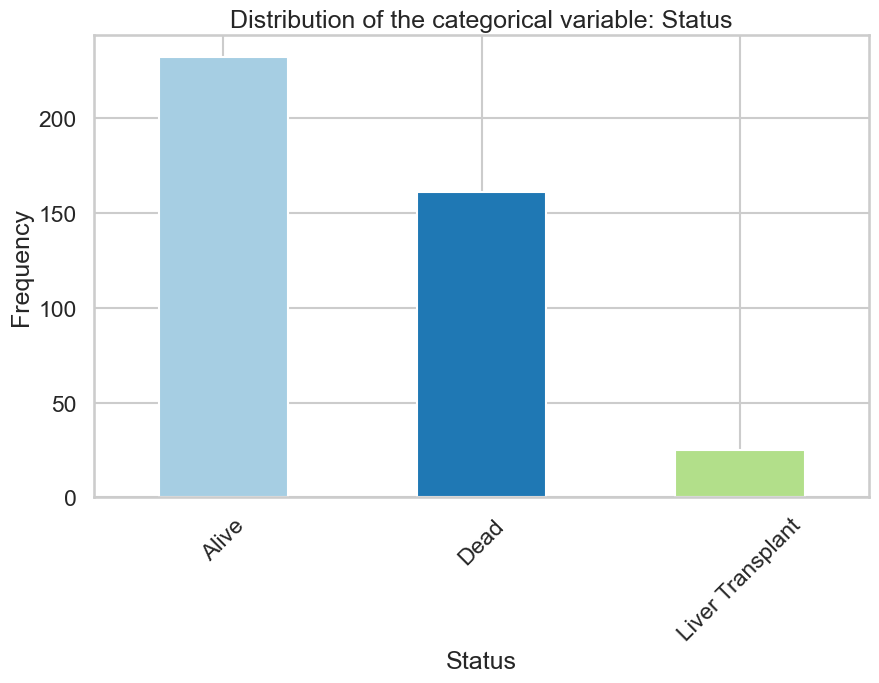

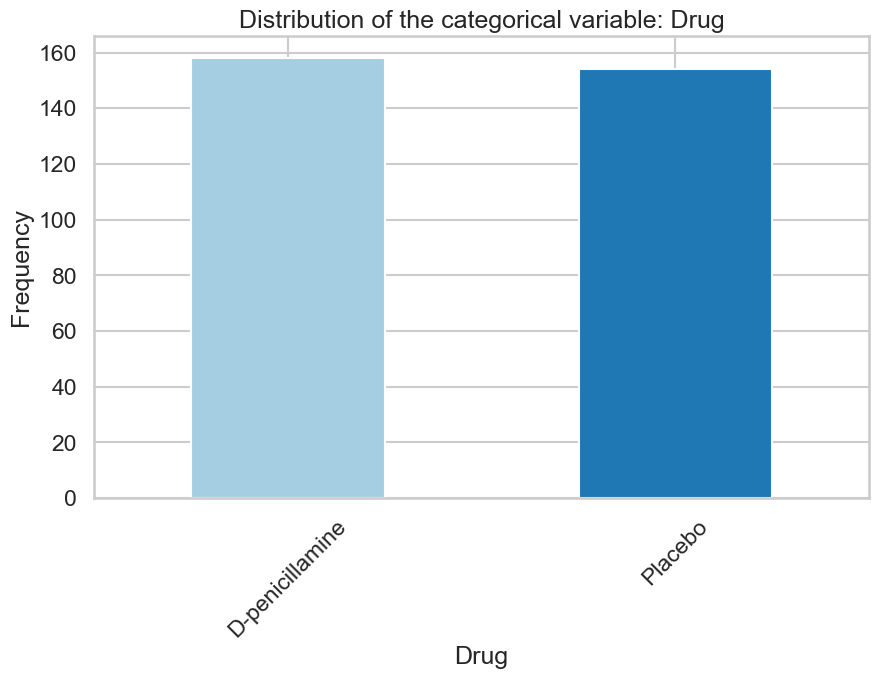

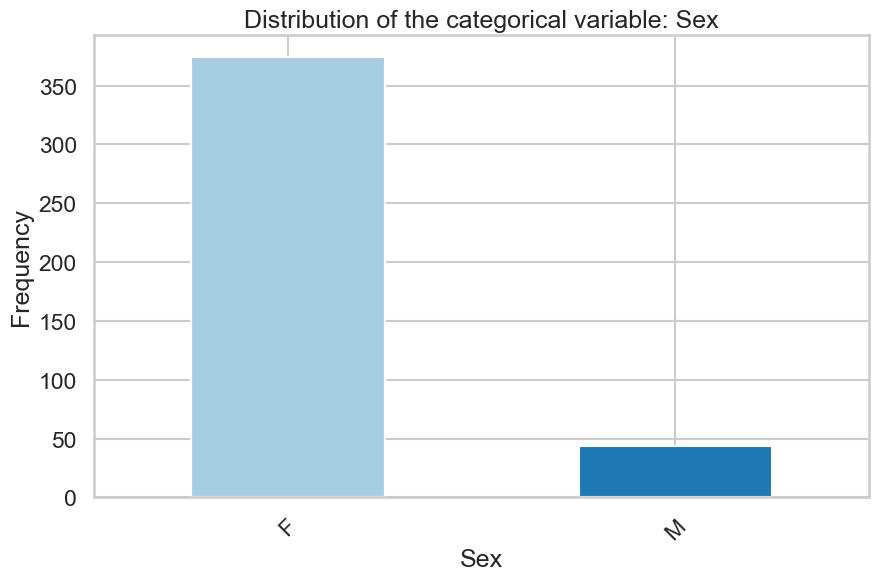

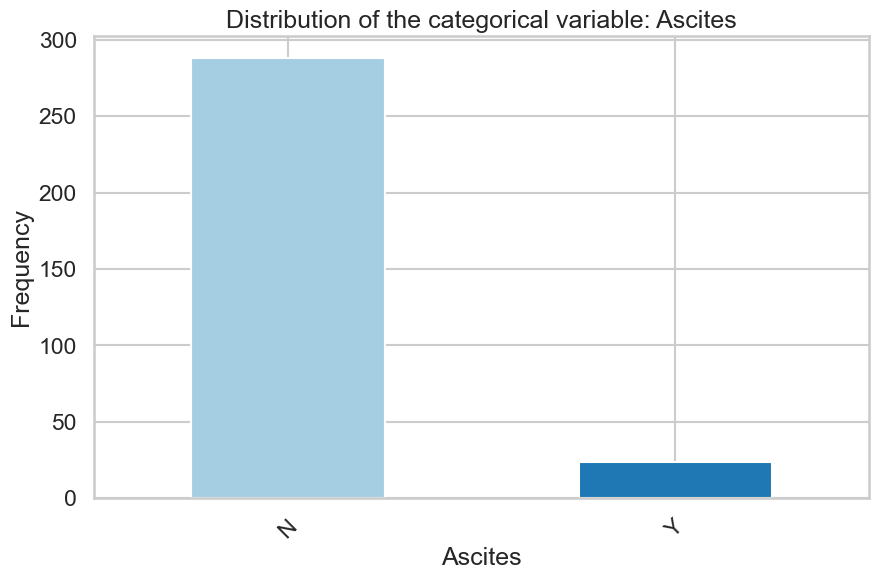

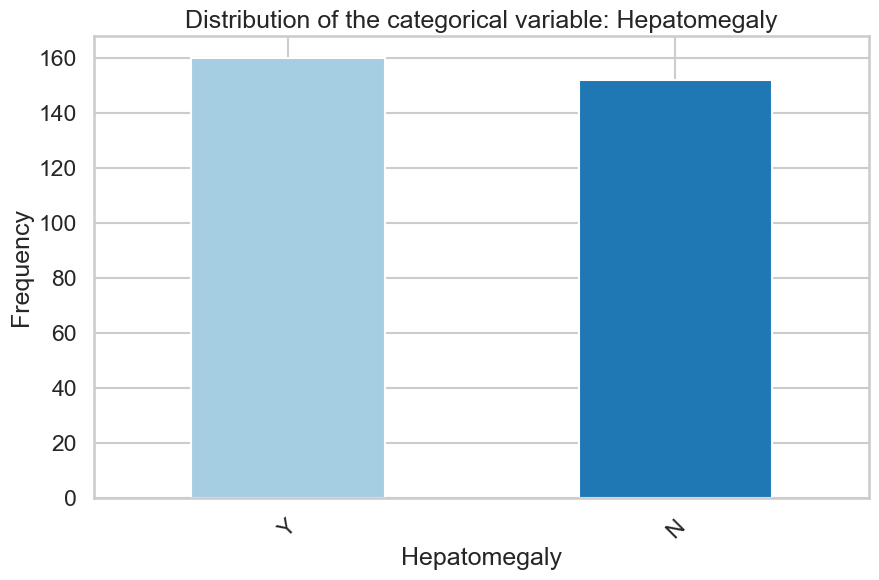

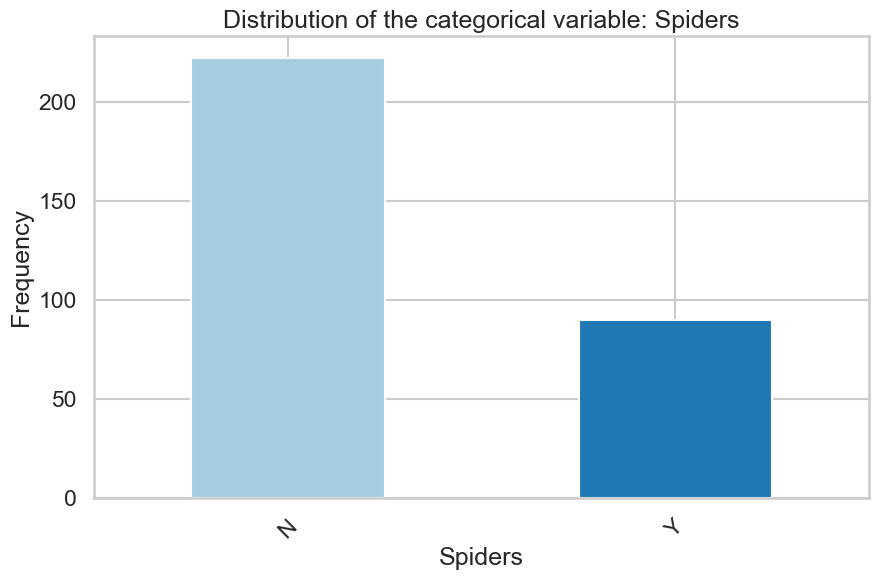

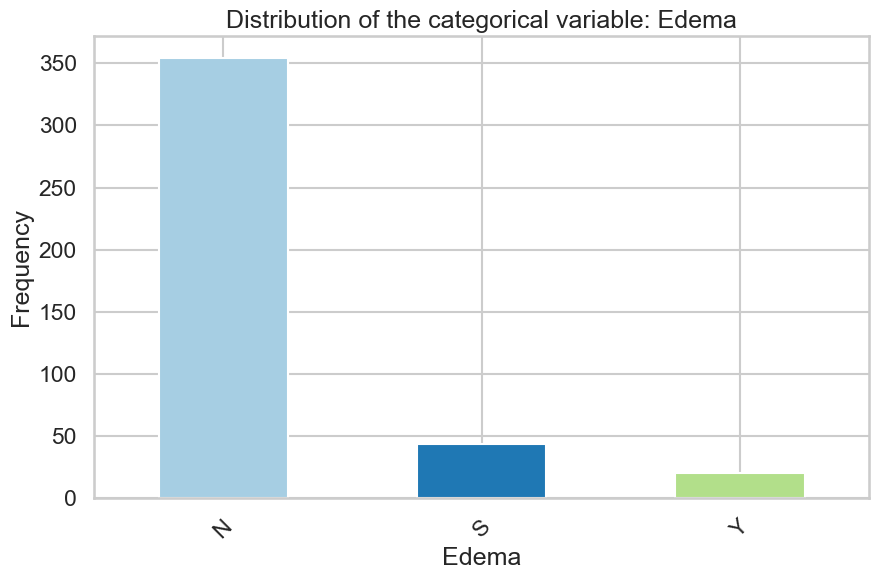

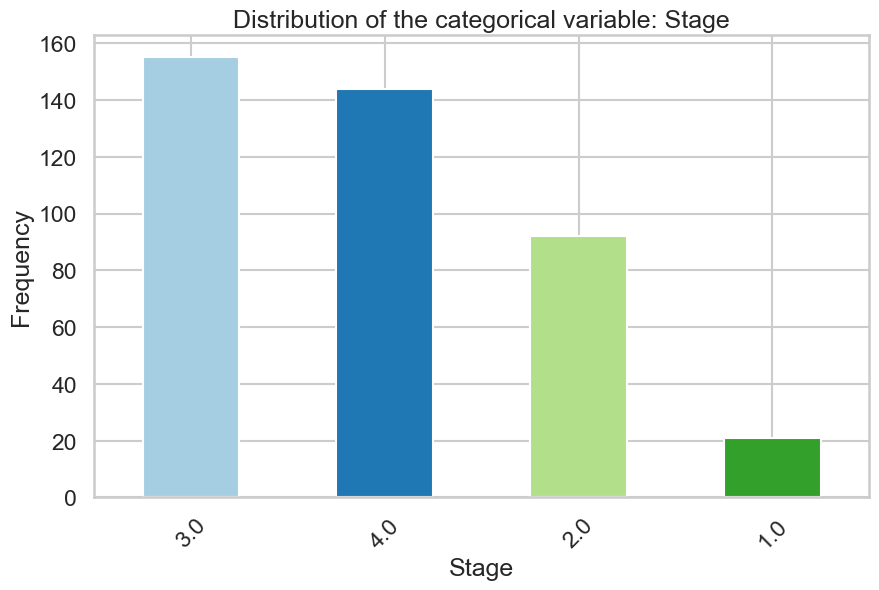

In [12]:
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    data[column].value_counts(dropna=True).plot(kind='bar', color=plt.cm.Paired(np.arange(len(data[column]))))
    plt.title(f'Distribution of the categorical variable: {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

## MISSING DATA

In [13]:
# Detect and analyze missing values for each variable in the dataset
missing_values = data.isnull().sum()
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Create a DataFrame for a better visualization
missing_data_analysis = pd.DataFrame({'Total Missing': missing_values, 'Percentage': missing_percentage})
missing_data_analysis = missing_data_analysis[missing_data_analysis['Total Missing'] > 0]  # Filtrar solo las variables con missing values

missing_data_analysis.sort_values(by='Total Missing', ascending=False)


,Total Missing,Percentage
Tryglicerides,136,32.535885
Cholesterol,134,32.057416
Copper,108,25.837321
Drug,106,25.358852
Ascites,106,25.358852
Hepatomegaly,106,25.358852
Spiders,106,25.358852
Alk_Phos,106,25.358852
SGOT,106,25.358852
Platelets,11,2.631579


## OUTLIERS

In [14]:
outliers_analysis = {}

for column in numeric_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    outliers_analysis[column] = {
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outliers Count': outliers.count(),
        'Outliers Percentage': (outliers.count() / len(data)) * 100
    }
outliers_analysis

{'N_Days': {'IQR': 1520.75,
  'Lower Bound': -1188.375,
  'Upper Bound': 4894.625,
  'Outliers Count': 0,
  'Outliers Percentage': 0.0},
 'Age': {'IQR': 5628.0,
  'Lower Bound': 7202.5,
  'Upper Bound': 29714.5,
  'Outliers Count': 0,
  'Outliers Percentage': 0.0},
 'Bilirubin': {'IQR': 2.5999999999999996,
  'Lower Bound': -3.0999999999999996,
  'Upper Bound': 7.299999999999999,
  'Outliers Count': 46,
  'Outliers Percentage': 11.004784688995215},
 'Cholesterol': {'IQR': 150.5,
  'Lower Bound': 23.75,
  'Upper Bound': 625.75,
  'Outliers Count': 20,
  'Outliers Percentage': 4.784688995215311},
 'Albumin': {'IQR': 0.5274999999999999,
  'Lower Bound': 2.4512500000000004,
  'Upper Bound': 4.561249999999999,
  'Outliers Count': 9,
  'Outliers Percentage': 2.15311004784689},
 'Copper': {'IQR': 81.75,
  'Lower Bound': -81.375,
  'Upper Bound': 245.625,
  'Outliers Count': 17,
  'Outliers Percentage': 4.0669856459330145},
 'Alk_Phos': {'IQR': 1108.5,
  'Lower Bound': -791.25,
  'Upper Bound':

## Functions for removing the outliers

In [15]:
def remove_outliers(df, multiplier=1.5, multiplier2 = 1):
    # Function for elimination numeric outliers from a dataset, with the multiplier the filter can be more or less sensible
    df_cleaned = df.copy()
    numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns.tolist()
    for column in numeric_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR

        # Filter outliers
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
        
        # Applying another filter in the variables where it is necessary for their distribution
        if column in ['Bilirubin', 'Copper', 'Alk_Phos', 'Cholesterol']:
            lower_bound = Q1 - multiplier2 * IQR
            upper_bound = Q3 + multiplier2 * IQR
            df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    
    return df_cleaned

## Evaluating distributions after removing outlieres

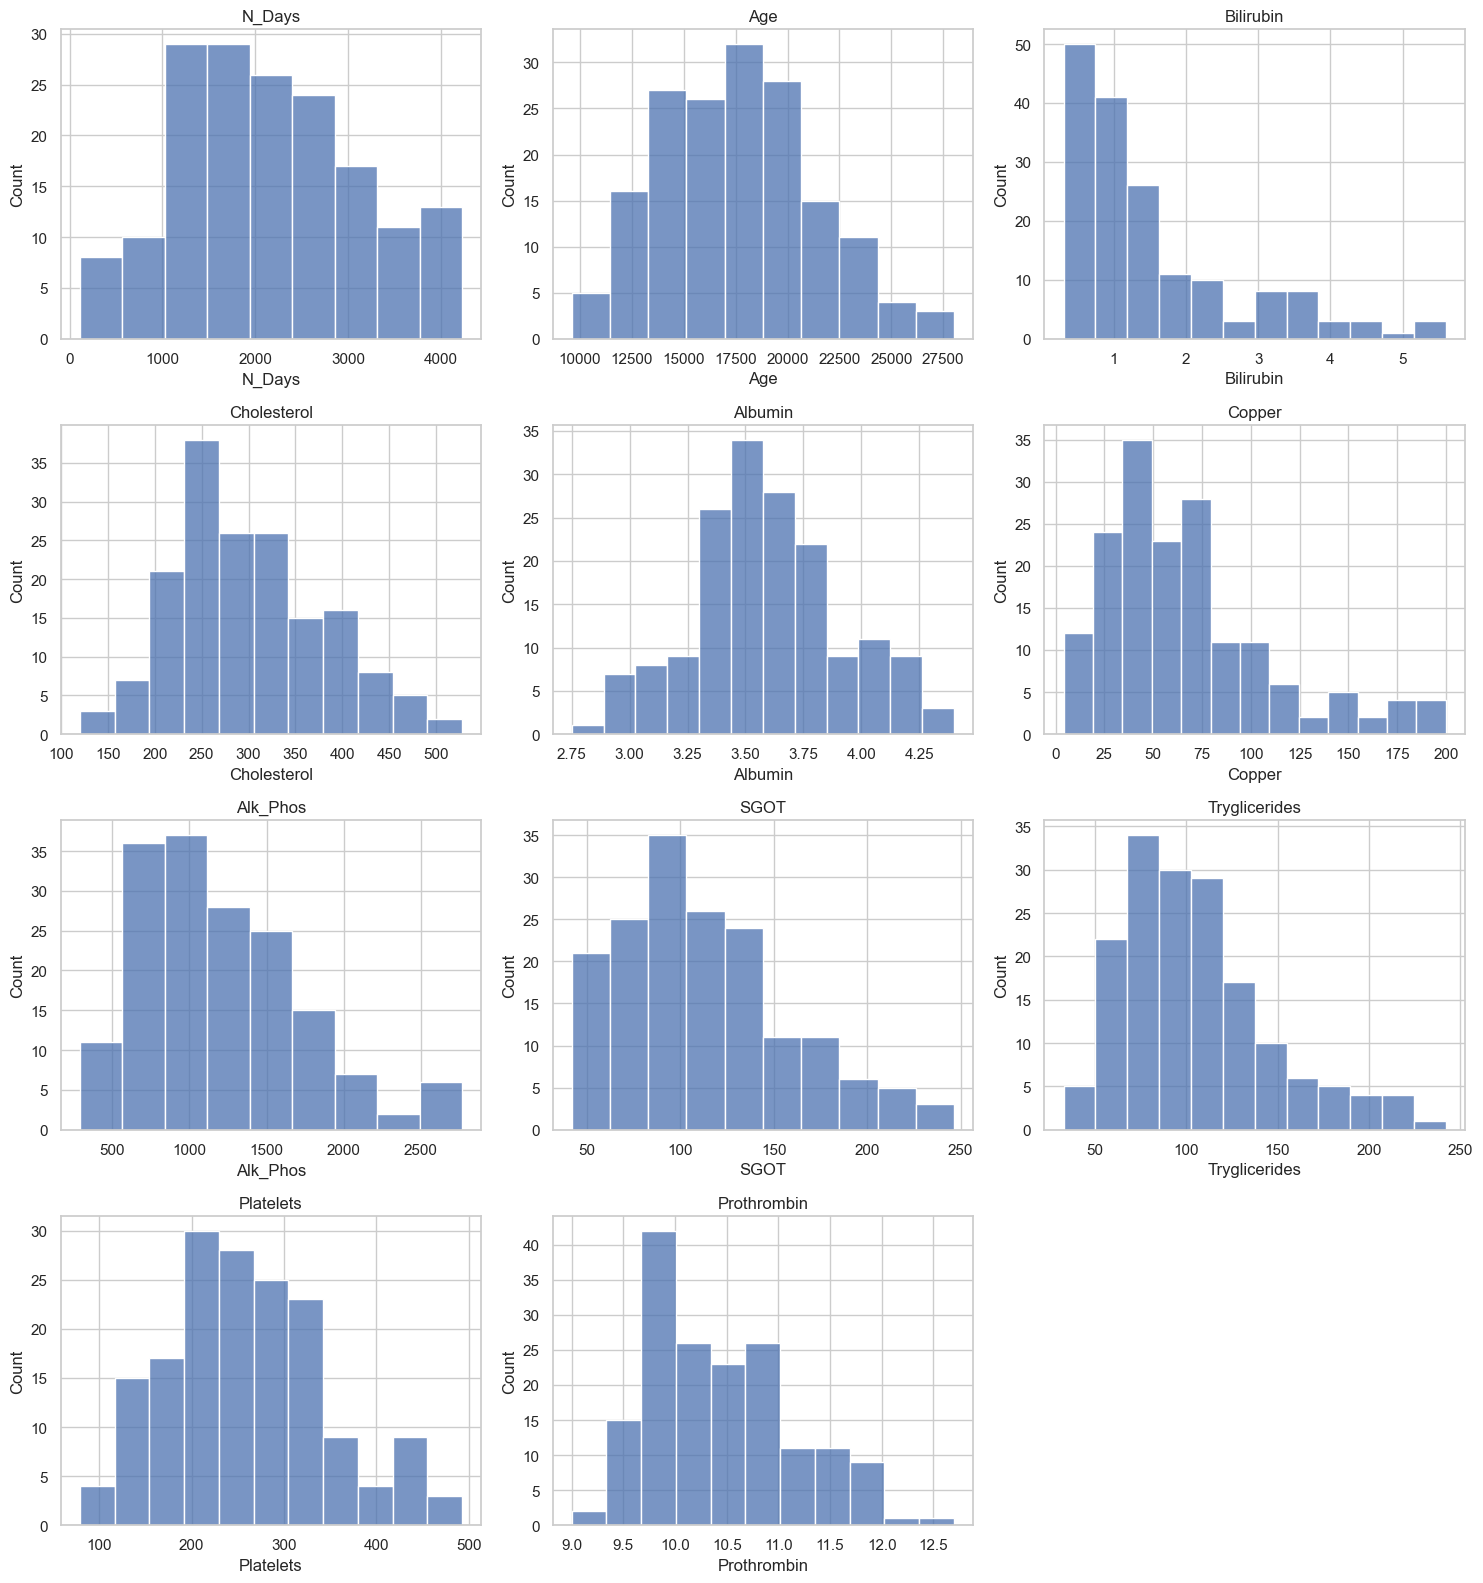

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration of the graphic styles
sns.set(style="whitegrid")

# Creating histograms and boxplots for each numeric column
n_rows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)

remove_outliers_data = remove_outliers(data, multiplier=1.5, multiplier2=1)
plt.figure(figsize=(15, 4 * n_rows))
for i, col in enumerate(numeric_columns):
    plt.subplot(n_rows, 3, i + 1)
    getattr(sns, 'histplot')(remove_outliers_data[col])
    plt.title(col)

plt.tight_layout()
# Saving the image of the normalized data histograms
plt.savefig('../images/no_outliers_histograms.png')
plt.show()

# IMPUTING DATA

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

def impute_dataset(data_original, normalize=True, random_seed=42):

    data = data_original.copy()
    # Identify numeric columns and categorical
    numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
    if 'ID' in numeric_columns:
        numeric_columns.remove('ID')
    categorical_columns = data.select_dtypes(include=['category']).columns.tolist()
    
    if normalize:
        # Standardize numeric columns
        scaler = StandardScaler()
        data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

    # Impute each numeric column using KNNImputer
    imputer_num = KNNImputer(n_neighbors=15)
    data[numeric_columns] = imputer_num.fit_transform(data[numeric_columns])

    # Inverse transform
    if normalize:
        data[numeric_columns] = scaler.inverse_transform(data[numeric_columns])

    # Impute each categorical column using RandomForestClassifier
    for col in categorical_columns:
        train_data = data[data[col].notnull()]
        test_data = data[data[col].isnull()]

        if test_data.shape[0] == 0:
            continue

        clf = RandomForestClassifier(random_state=random_seed)
        clf.fit(train_data.drop(categorical_columns, axis=1), train_data[col])
        data.loc[data[col].isnull(), col] = clf.predict(test_data.drop(categorical_columns, axis=1))

    return data


# EVALUATING IMPUTATION

### In order to prove that the imputation is well done we need to hide data that we already now and try to impute it with our function, then we can check if the imputated data is realistic compared to its real value.

In [18]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, f1_score

X = data.copy()
if 'ID' in X.columns:
    X.drop('ID', axis=1, inplace=True)

# Function to randomly hide data in a column
def hide_data(df, column, hide_ratio=0.1):
    df_copy = df.copy()
    mask = df_copy[column].notna()
    data_to_hide = df_copy[column].loc[mask].sample(frac=hide_ratio, random_state = 42).index
    df_copy.loc[data_to_hide, column] = np.nan
    return df_copy, df.loc[data_to_hide, column]

# Function to evaluate imputation
def evaluate_imputation(df, column, hide_ratio=0.1):
    # Hide data
    df_hidden, original_data = hide_data(df, column, hide_ratio)
    
    # Impute hidden data using impute_dataset
    df_imputed = impute_dataset(df_hidden)

    # Compare imputed values with original ones
    imputed_values = df_imputed.loc[original_data.index, column]

    # Calculate metrics for numeric and categorical data
    if df[column].dtype == 'float64' or df[column].dtype == 'int64':
        mse = mean_squared_error(original_data.dropna(), imputed_values.dropna())
        r2 = r2_score(original_data.dropna(), imputed_values.dropna())
        mae = mean_absolute_error(original_data.dropna(), imputed_values.dropna())
        rmse = np.sqrt(mse)
        mape = np.mean(np.abs((original_data.dropna() - imputed_values.dropna()) / original_data.dropna())) * 100
        return mse, r2, mae, rmse, mape
    else:
        accuracy = accuracy_score(original_data.dropna(), imputed_values.dropna())
        f1 = f1_score(original_data.dropna(), imputed_values.dropna(), average='weighted')
        return accuracy, f1

# Calculate average metrics for all variables
metrics_num = {'mse': [], 'r2': [], 'mae': [], 'rmse': [], 'mape': []}
metrics_cat = {'accuracy': [], 'f1': []}

for column in X.columns:
    if X[column].dtype == 'float64' or X[column].dtype == 'int64':
        mse, r2, mae, rmse, mape = evaluate_imputation(X, column, hide_ratio=0.1)
        print(f"Numeric variable: {column}, MSE: {mse}, R2: {r2}, MAE: {mae}, RMSE: {rmse}, MAPE: {mape}")
        metrics_num['mse'].append(mse)
        metrics_num['r2'].append(r2)
        metrics_num['mae'].append(mae)
        metrics_num['rmse'].append(rmse)
        metrics_num['mape'].append(mape)
    else:
        accuracy, f1 = evaluate_imputation(X, column, hide_ratio=0.1)
        print(f"Categorical variable: {column}, Accuracy: {accuracy}, F1 Score: {f1}")
        metrics_cat['accuracy'].append(accuracy)
        metrics_cat['f1'].append(f1)

# Calculate average
mean_metrics_num = {k: sum(v) / len(v) for k, v in metrics_num.items() if v}
mean_metrics_cat = {k: sum(v) / len(v) for k, v in metrics_cat.items() if v}

print("Average metrics for numeric variables:", mean_metrics_num)
print("Average metrics for categorical variables:", mean_metrics_cat)


Numeric variable: N_Days, MSE: 1466164.980952381, R2: 0.19906550591858152, MAE: 916.3746031746033, RMSE: 1210.8529972512688, MAPE: 167.35295587964788
Categorical variable: Status, Accuracy: 0.7857142857142857, F1 Score: 0.7665379665379666
Categorical variable: Drug, Accuracy: 0.4838709677419355, F1 Score: 0.47284256961676313
Numeric variable: Age, MSE: 15535161.196190473, R2: 0.04857652240700017, MAE: 3357.6222222222214, RMSE: 3941.4668838124812, MAPE: 19.52416708030867
Categorical variable: Sex, Accuracy: 0.8809523809523809, F1 Score: 0.8251959011452682
Categorical variable: Ascites, Accuracy: 0.9354838709677419, F1 Score: 0.9354838709677419
Categorical variable: Hepatomegaly, Accuracy: 0.7096774193548387, F1 Score: 0.7115605928509154
Categorical variable: Spiders, Accuracy: 0.7419354838709677, F1 Score: 0.7165200391006842
Categorical variable: Edema, Accuracy: 0.8571428571428571, F1 Score: 0.801029601029601
Numeric variable: Bilirubin, MSE: 9.286168253968253, R2: 0.45222407554791644,

# DATA PARTITION AND CROSS VALIDATION

### BALANCE DATASET

In [19]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

def balance_dataset(X, y, do_oversample=False, do_undersample=False, random_state=42):

    if not do_oversample and not do_undersample:
        # If no sampling is required, return the original dataset
        return X, y

    if do_oversample and do_undersample:

        # Calculate the class counts
        class_counts = Counter(y)
        majority_class_count = max(class_counts.values())
        minority_class_count = min(class_counts.values())

        # Calculate the new desired amount for the minority classes
        desired_size = int(minority_class_count + (majority_class_count - minority_class_count) // 1.2)

        # Apply SMOTE only to the minority classes
        sampling_strategy_smote = {class_label: desired_size for class_label, count in class_counts.items() if count < desired_size}
        smote = SMOTE(sampling_strategy=sampling_strategy_smote, random_state=random_state)
        X_resampled, y_resampled = smote.fit_resample(X, y)

        # Apply undersampling to all classes to match the size of the new minority class
        sampling_strategy_under = {class_label: desired_size for class_label in class_counts.keys()}
        under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy_under, random_state=random_state)
        X_resampled, y_resampled = under_sampler.fit_resample(X_resampled, y_resampled)
    elif do_oversample:
        smote = SMOTE(sampling_strategy='auto', random_state=random_state)
        X_resampled, y_resampled = smote.fit_resample(X, y)
    elif do_undersample:
        under_sampler = RandomUnderSampler(sampling_strategy='auto', random_state=random_state)
        X_resampled, y_resampled = under_sampler.fit_resample(X, y)

    return X_resampled, y_resampled


# Evaluating distributions after normalization

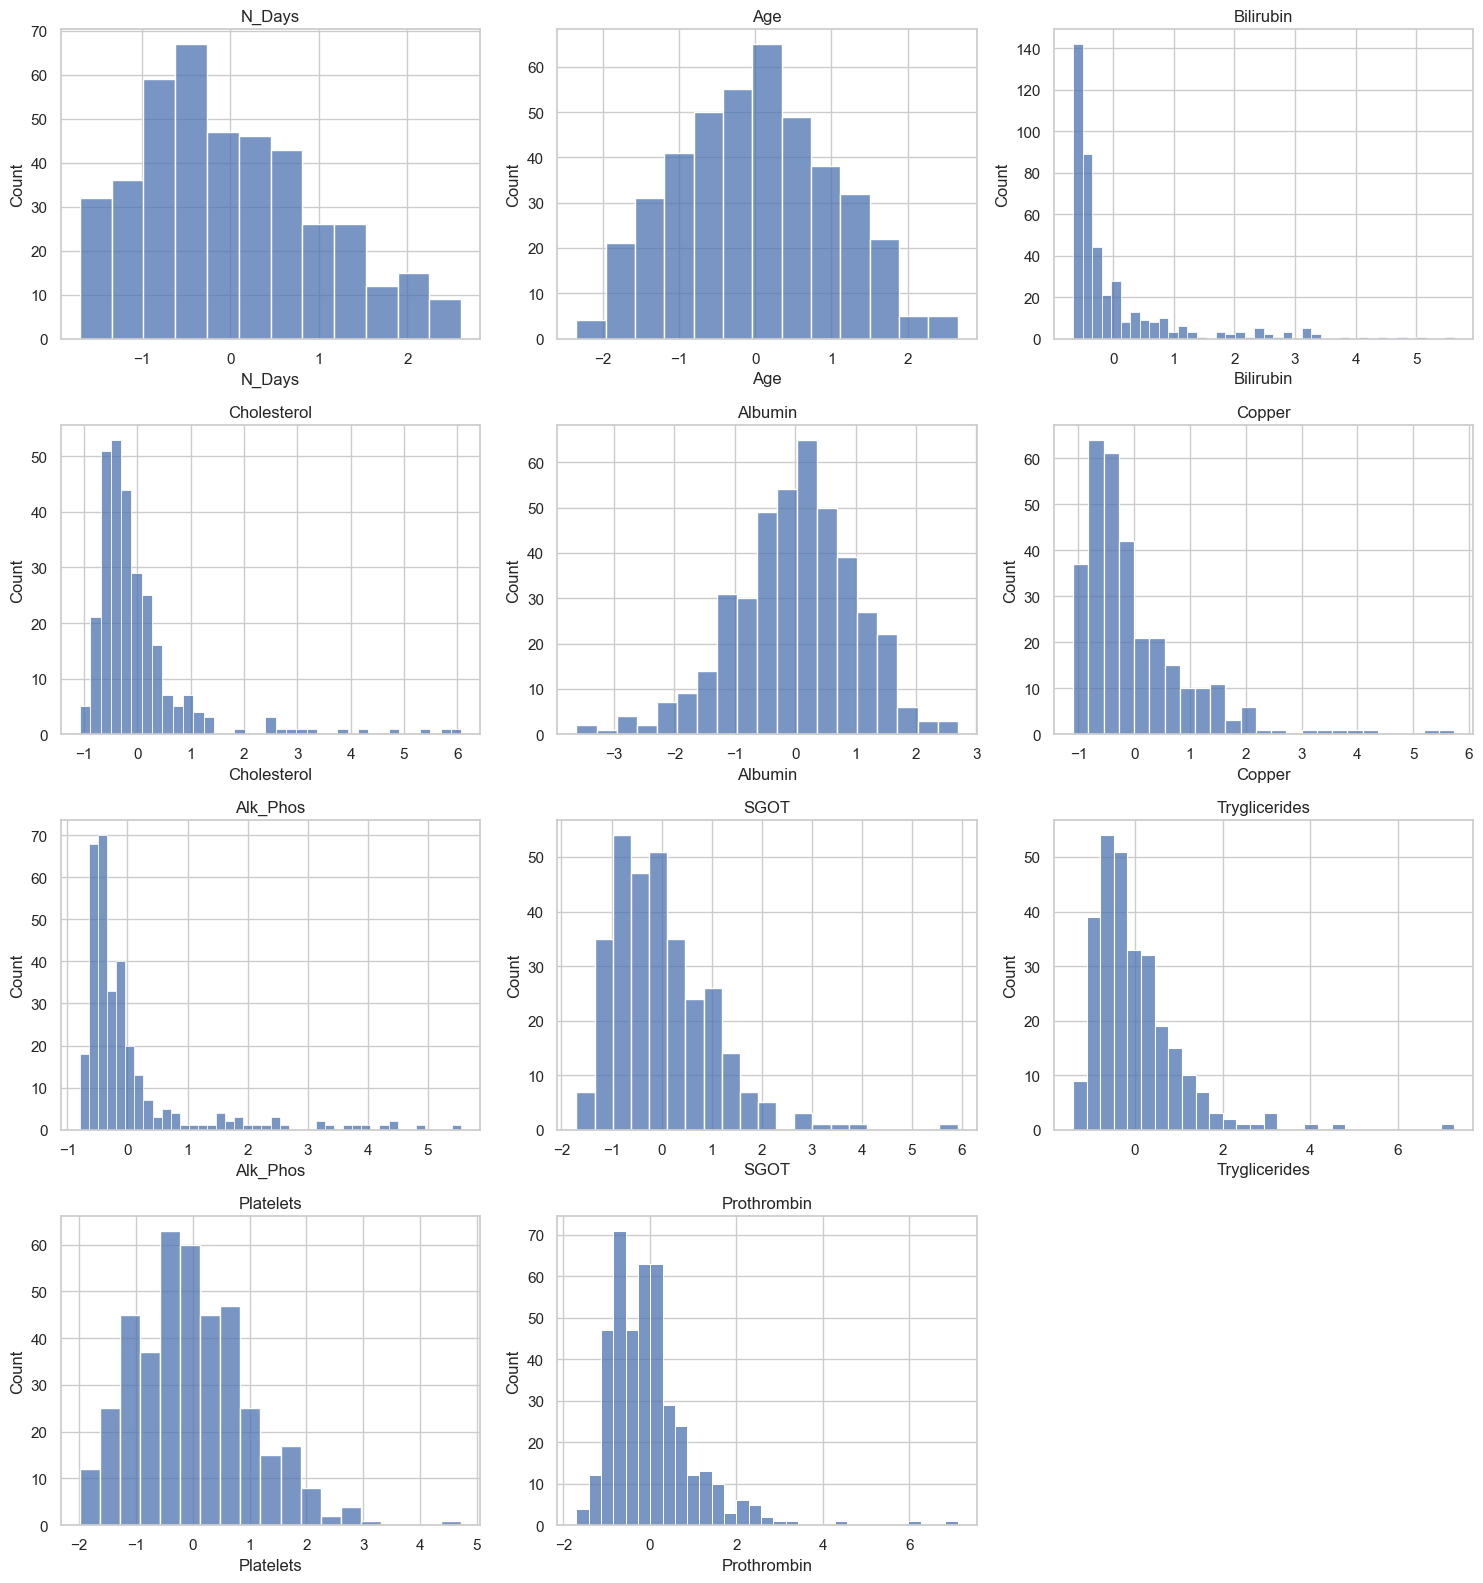

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration of the graphic styles
sns.set(style="whitegrid")

# Creating histograms and boxplots for each numeric column
n_rows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)

normalize_data = data.copy()
normalize_data[numeric_columns] = preprocessing.StandardScaler().fit_transform(normalize_data[numeric_columns])

plt.figure(figsize=(15, 4 * n_rows))
for i, col in enumerate(numeric_columns):
    plt.subplot(n_rows, 3, i + 1)
    getattr(sns, 'histplot')(normalize_data[col])
    plt.title(col)

plt.tight_layout()
# Saving the image of the normalized data histograms
plt.savefig('../images/normalized_data_histograms.png')
plt.show()

# Analysis of numerical variables correlations

Top Correlated Variable Pairs:
   Variable 1     Variable 2  Correlation       P-value
17  Bilirubin         Copper     0.486429  3.256319e-26
20  Bilirubin  Tryglicerides     0.464358  9.597327e-24
19  Bilirubin           SGOT     0.463859  1.086121e-23
15  Bilirubin    Cholesterol     0.444893  1.037343e-21
3      N_Days        Albumin     0.430829  2.547812e-20


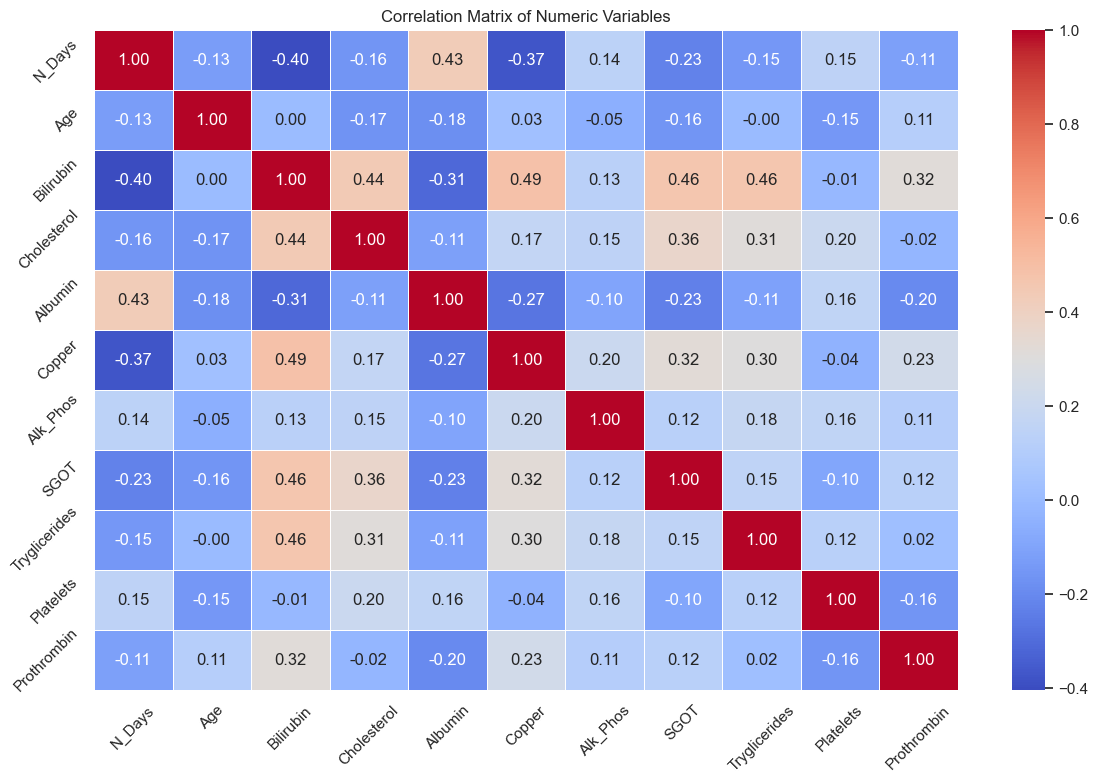

In [21]:
from scipy.stats import pearsonr
from itertools import combinations

# Calculating the correlation matrix

data_imputed = impute_dataset(data)
correlation_matrix = data_imputed[numeric_columns].corr()

# Statistics of the correlations
# Preparing a list to store the results
significant_correlations = []

# Iterating over all pairs of numeric columns
for (column1, column2) in combinations(numeric_columns, 2):
    # Skipping comparison with the same column
    if column1 != column2:
        # Calculating Pearson correlation and the p-value
        corr, p_value = pearsonr(data_imputed[column1], data_imputed[column2])

        # Considering correlations significant if p-value < 0.05
        if p_value < 0.05:
            # Storing the column names, correlation, and p-value
            significant_correlations.append((column1, column2, corr, p_value))

# Converting results to a DataFrame for better visualization
significant_correlations_df = pd.DataFrame(significant_correlations, 
                                           columns=['Variable 1', 'Variable 2', 'Correlation', 'P-value'])

# Displaying the significant correlations

# Sorting by the absolute value of correlation to find the strongest relationships
most_correlated_pairs = significant_correlations_df.copy()
most_correlated_pairs['Absolute Correlation'] = most_correlated_pairs['Correlation'].abs()
most_correlated_pairs.sort_values(by='Absolute Correlation', ascending=False, inplace=True)

# Selecting the top correlated pairs
# You can change the number 5 to select more or fewer pairs
top_correlated_pairs = most_correlated_pairs.head(5)

print("Top Correlated Variable Pairs:")
print(top_correlated_pairs[['Variable 1', 'Variable 2', 'Correlation', 'P-value']])

# Visualizing the correlation matrix as a heatmap
# Setting up the matplotlib figure
plt.figure(figsize=(12, 8))

# Drawing the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Adding title and labels
plt.title('Correlation Matrix of Numeric Variables')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.tight_layout()
# Saving the image of the correlation matrix
plt.savefig('../images/correlation_matrix.png')

# Showing the plot
plt.show()


# Analysis of the relationship between numeric and categorical variables and the patient Status

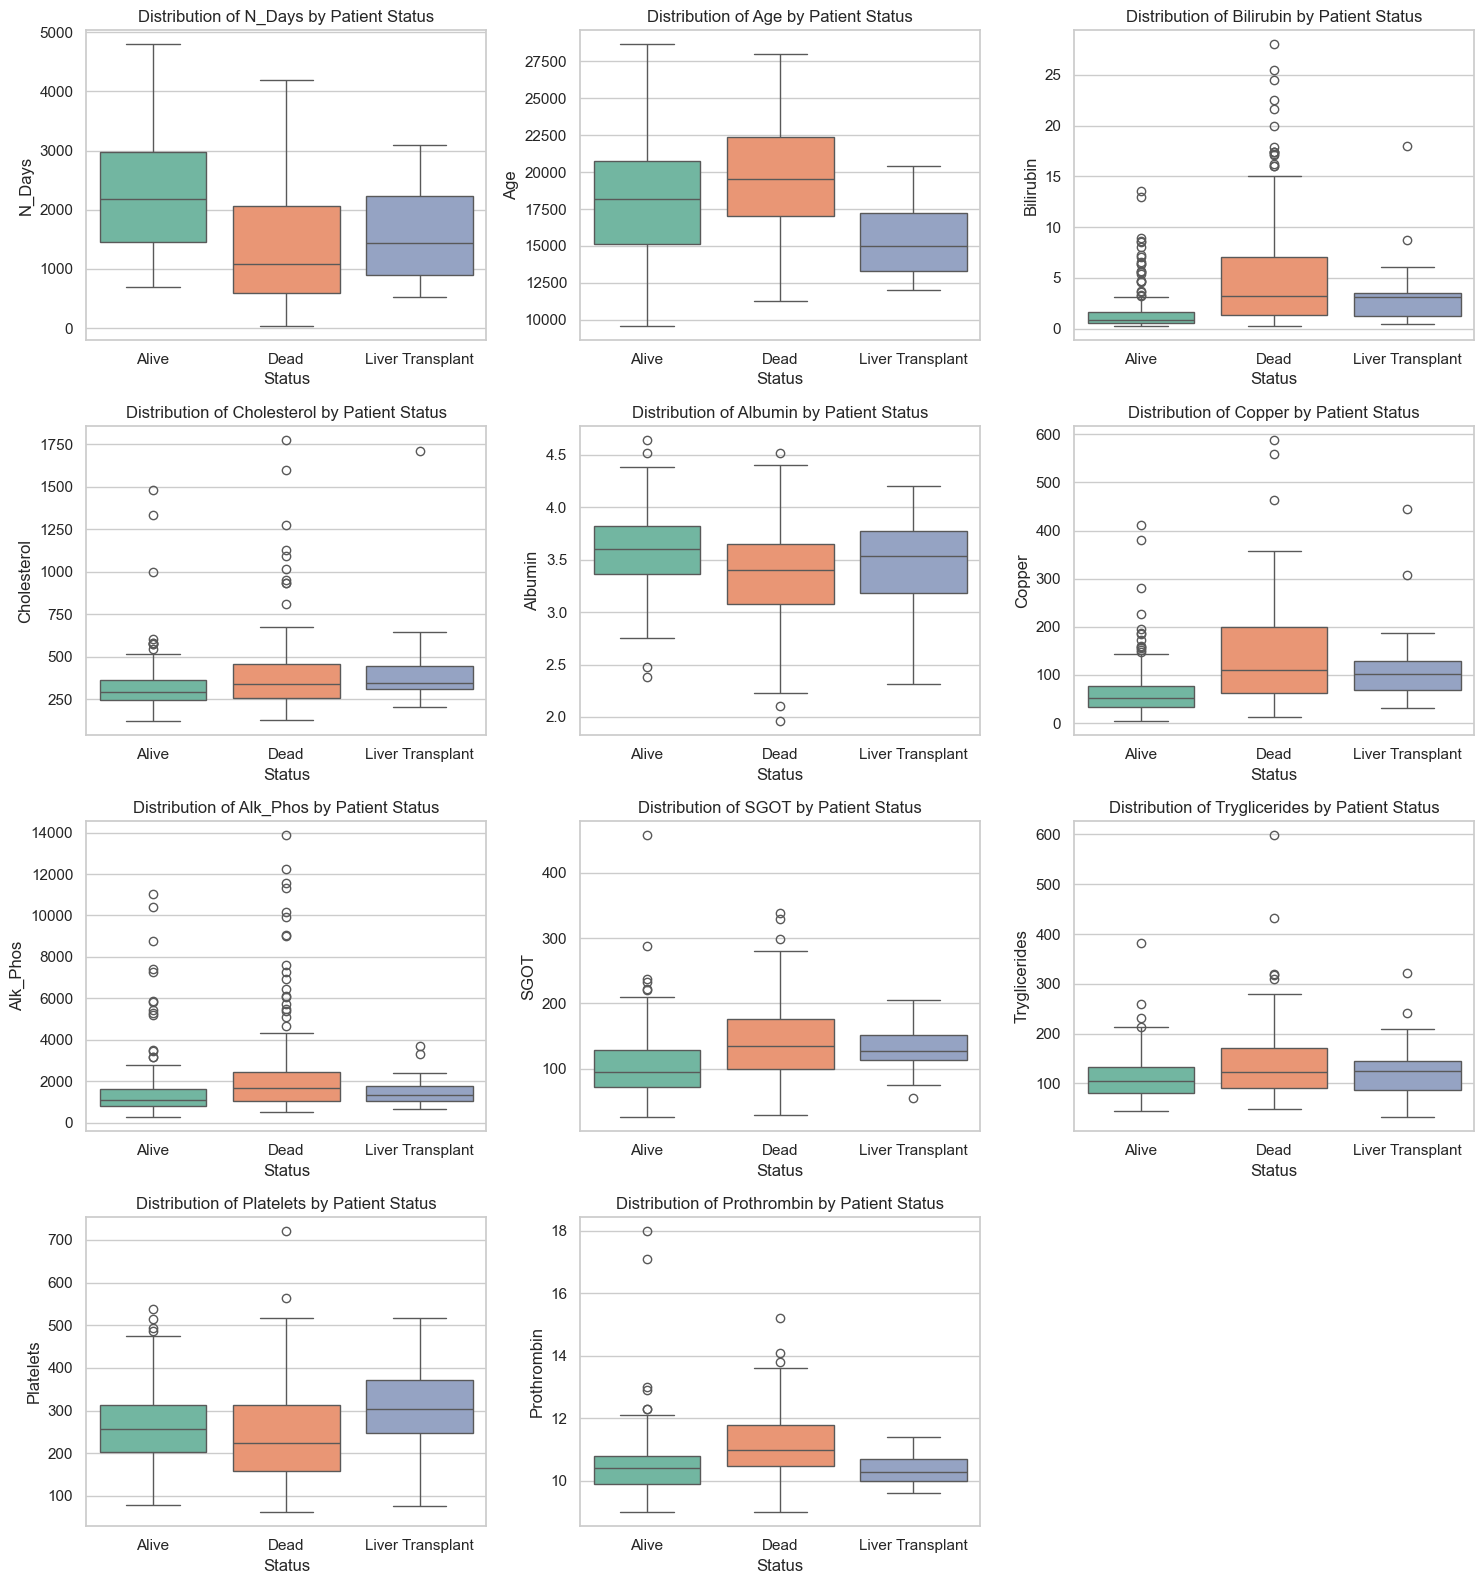

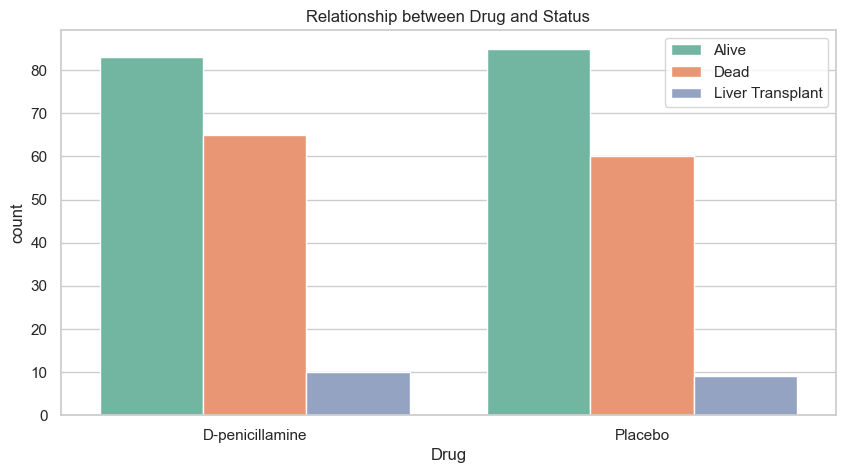

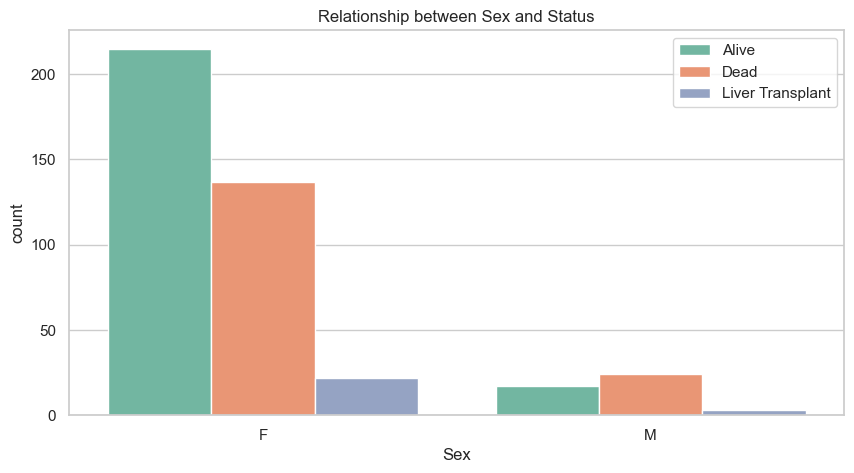

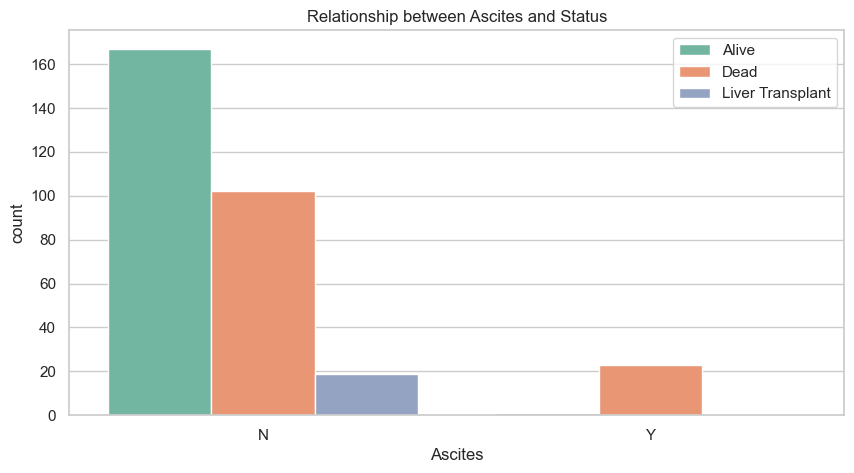

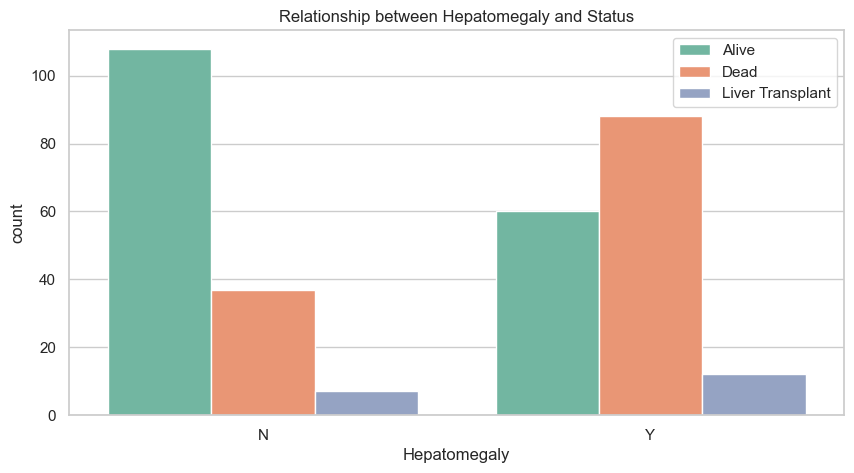

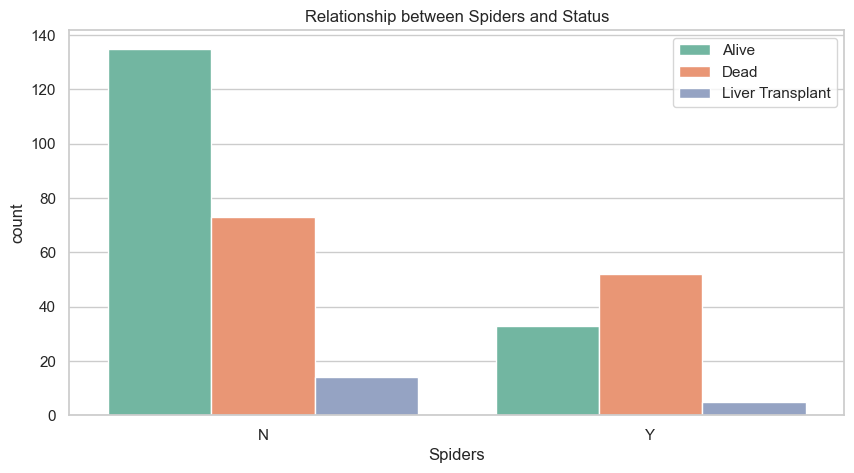

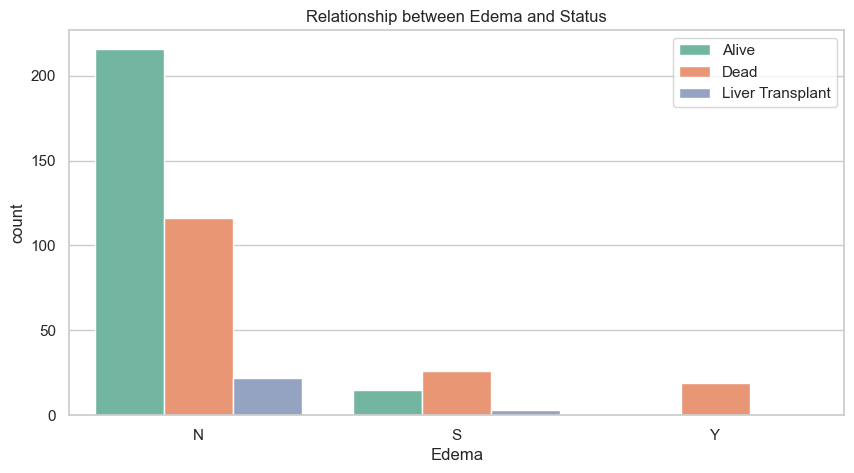

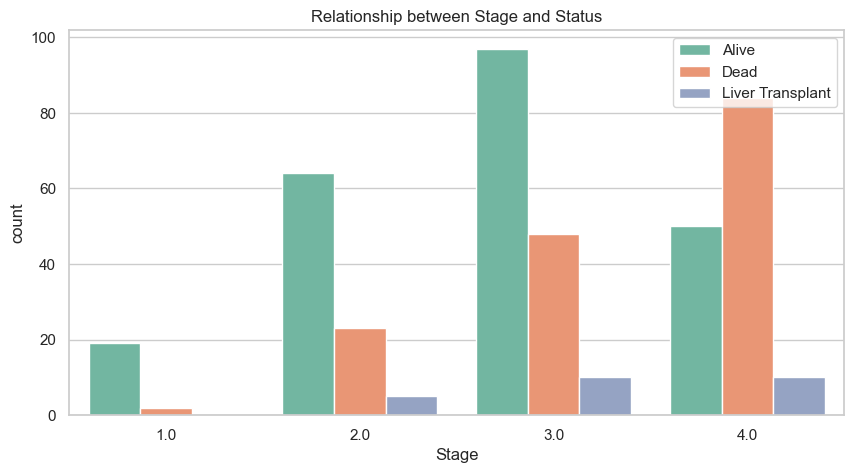

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Using a clear color palette
palette = sns.color_palette("Set2", len(data['Status'].unique()))

# Plotting for numeric columns
# Configuration of the graphic styles
sns.set(style="whitegrid")

# Creating histograms and boxplots for each numeric column
n_rows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)


plt.figure(figsize=(15, 4 * n_rows))  # Adjust the figure size
for i, column in enumerate(numeric_columns):
    if column != 'Status':
        plt.subplot(n_rows, 3, i + 1)  # Create a subplot for each variable
        sns.boxplot(x='Status', y=column, data=data, hue='Status', palette=palette)
        plt.title(f'Distribution of {column} by Patient Status')

plt.tight_layout()  # Adjust the layout
plt.savefig('../images/Numeric_Status_boxplot.png')  # Save the figure
plt.show()

# Plotting for categorical columns
for i, column in enumerate(categorical_columns):
    if column != 'Status':
        plt.figure(figsize=(10, 5))
        sns.countplot(x=column, hue='Status', data=data, palette=palette)
        plt.title(f'Relationship between {column} and Status')
        plt.legend(loc='upper right')
        plt.savefig(f'../images/{column}Status.png')  # Saving the plot
        plt.show()


# Dimensionality study

# Principal Component Analysis

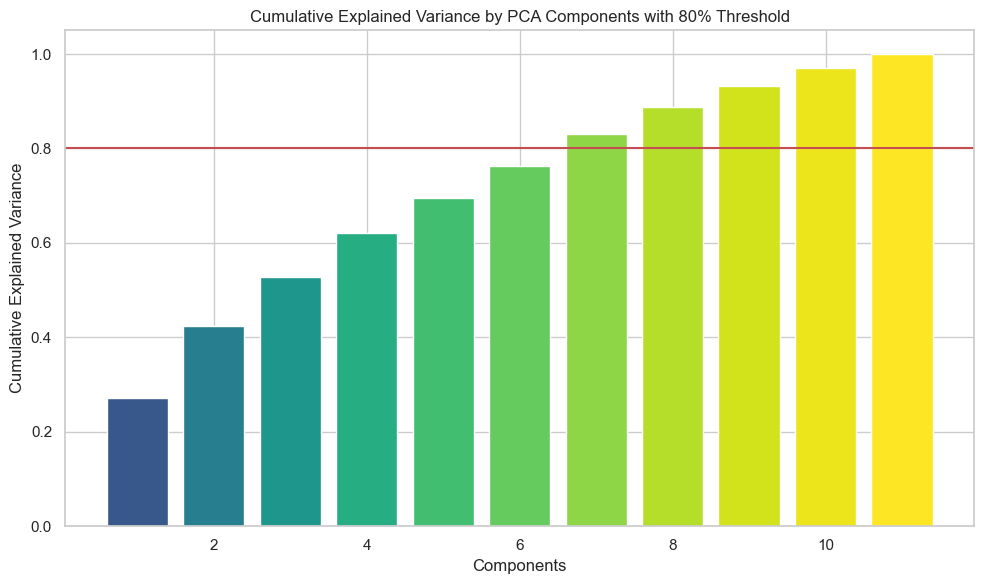

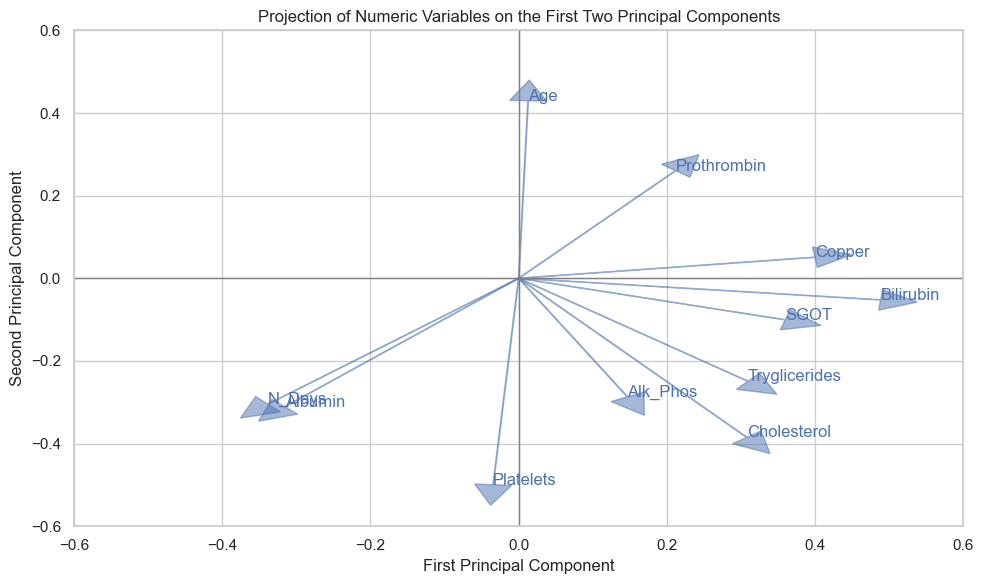

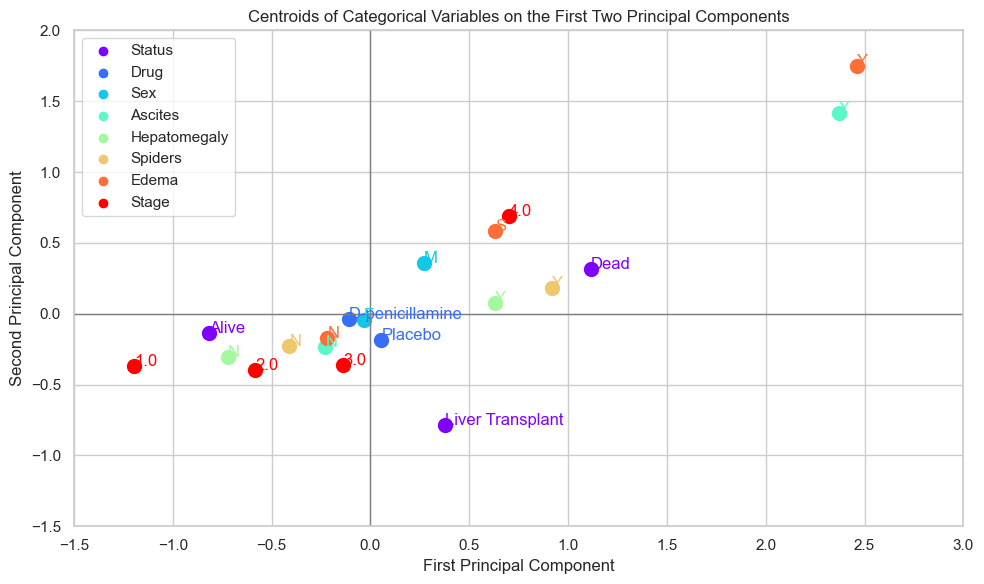

In [23]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np


# Impute the dataset
data_imputed = impute_dataset(data)


# Deleting ID column
if 'ID' in data_imputed.columns:
    data_imputed.drop('ID', axis=1, inplace=True)

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_imputed[numeric_columns])

# Performing PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)


# Plotting the cumulative explained variance
plt.figure(figsize=(10, 6))
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
colors = plt.cm.viridis(cumulative_variance / cumulative_variance[-1])  # Normalize to range [0,1]
plt.bar(range(1, len(cumulative_variance) + 1), cumulative_variance, color=colors)
plt.axhline(y=0.8, color='r', linestyle='-')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Components')
plt.title('Cumulative Explained Variance by PCA Components with 80% Threshold')
plt.tight_layout()
plt.savefig('../images/cumulative_explained_variance.png')
plt.show()

# Plotting the projections of numeric variables with coordinate axes
plt.figure(figsize=(10, 6))
plt.axhline(y=0, color='grey', lw=1)
plt.axvline(x=0, color='grey', lw=1)
for i, col in enumerate(numeric_columns):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], 
              color='b', alpha=0.5, head_width=0.05, head_length=0.05)
    plt.text(pca.components_[0, i], pca.components_[1, i], col, color='b')

plt.xlim(-0.6, 0.6)
plt.ylim(-0.6, 0.6)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Projection of Numeric Variables on the First Two Principal Components')
plt.tight_layout()
plt.savefig('../images/numeric_variables_projection.png')
plt.show()

# Plotting centroids for categorical variables with adjusted margins and legend
plt.figure(figsize=(10, 6))
plt.axhline(y=0, color='grey', lw=1)
plt.axvline(x=0, color='grey', lw=1)
colors = plt.cm.rainbow(np.linspace(0, 1, len(categorical_columns)))
for i, col in enumerate(categorical_columns):
    color = colors[i]
    for category in data[col].unique():
        category_data = pca_data[data[col] == category]
        if len(category_data) > 0:
            centroid = np.mean(category_data, axis=0)
            plt.scatter(centroid[0], centroid[1], color=color, s=100)
            plt.text(centroid[0], centroid[1], f'{category}', color=color)

    plt.scatter([], [], color=color, label=col)  # Dummy scatter for legend

plt.xlim(-1.5, 3)
plt.ylim(-1.5, 2)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Centroids of Categorical Variables on the First Two Principal Components')
plt.legend()
plt.tight_layout()
plt.savefig('../images/categorical_variables_centroids.png')
plt.show()


# CROSS VALIDATION FUNCTION

In [24]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from xgboost import XGBClassifier

def cross_validate_model(model, X, y, n_splits=5, use_ordinal_encoding=False, do_oversampling=False, do_undersampling=False, normalize=False):
        kf = StratifiedKFold(n_splits=n_splits)
        metrics_train = {'accuracy': [], 'f1': [], 'precision': [], 'recall': []}
        metrics_val = {'accuracy': [], 'f1': [], 'precision': [], 'recall': []}

        categorical_columns = X.select_dtypes(include=['category']).columns.tolist()
        numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

        for train_index, val_index in kf.split(X, y):

            if len(val_index) == 0 or len(train_index) == 0:
                continue

            X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
            y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

            # Imputation using impute_dataset function
            X_train_fold_imputed = impute_dataset(X_train_fold)
            X_val_fold_imputed = impute_dataset(X_val_fold)
            
            # Encoding
            if use_ordinal_encoding:
                encoder = OrdinalEncoder()
            else:
                encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
            
            X_train_fold_encoded = encoder.fit_transform(X_train_fold_imputed[categorical_columns])
            X_val_fold_encoded = encoder.transform(X_val_fold_imputed[categorical_columns])
            
            # Combine numeric and encoded categorical features
            X_train_fold_combined = np.concatenate((X_train_fold_imputed[numeric_columns], X_train_fold_encoded), axis=1)
            X_val_fold_combined = np.concatenate((X_val_fold_imputed[numeric_columns], X_val_fold_encoded), axis=1)

            # Apply balance_dataset
            X_train_fold_balanced, y_train_fold_balanced = balance_dataset(X_train_fold_combined, y_train_fold, do_oversample=do_oversampling, do_undersample=do_undersampling, random_state=42)

            # Normalization
            if normalize:
                scaler = StandardScaler()
                X_train_fold_balanced = scaler.fit_transform(X_train_fold_balanced)
                X_val_fold_combined = scaler.fit_transform(X_val_fold_combined)
            

            # Train the model
            if type(model) == XGBClassifier:
                label_encoder = LabelEncoder()
                y_train_fold_balanced = label_encoder.fit_transform(y_train_fold_balanced)
                y_val_fold = label_encoder.transform(y_val_fold)
            model.fit(X_train_fold_balanced, y_train_fold_balanced)
            
            # Predicció i avaluació per al conjunt d'entrenament
            y_train_pred = model.predict(X_train_fold_balanced)
            metrics_train['accuracy'].append(accuracy_score(y_train_fold_balanced, y_train_pred))
            metrics_train['f1'].append(f1_score(y_train_fold_balanced, y_train_pred, average='weighted'))
            metrics_train['precision'].append(precision_score(y_train_fold_balanced, y_train_pred, average='weighted', zero_division=0))
            metrics_train['recall'].append(recall_score(y_train_fold_balanced, y_train_pred, average='weighted', zero_division=0))

            # Predicció i avaluació per al conjunt de validació
            y_val_pred = model.predict(X_val_fold_combined)
            metrics_val['accuracy'].append(accuracy_score(y_val_fold, y_val_pred))
            metrics_val['f1'].append(f1_score(y_val_fold, y_val_pred, average='weighted'))
            metrics_val['precision'].append(precision_score(y_val_fold, y_val_pred, average='weighted', zero_division=0))
            metrics_val['recall'].append(recall_score(y_val_fold, y_val_pred, average='weighted', zero_division=0))

        # Calcula la mitjana de les mètriques
        avg_metrics_train = {metric: np.mean(values) for metric, values in metrics_train.items()}
        avg_metrics_val = {metric: np.mean(values) for metric, values in metrics_val.items()}

        return avg_metrics_train, avg_metrics_val

# FIND BEST DATASET FOR EACH MODEL

### FUNCTIONS FOR MODIFYING THE DATABASE

In [25]:
def remove_bottom_rows(df, n=106):
    return df[:-n]


### Dropping the ID column as it is an identifyer but as depending on the time a person entered the experiment the probability of survaving is different an not constant so the models use this in order to have better predictions but it is not real as if we need to predict a new person we would not have that information.

In [26]:
# Drop the ID column as it may confuse the model

if 'ID' in data.columns:
    data = data.drop('ID', axis=1)

### FUNCTION FOR FINDING THE BEST DATASET FOR EACH MODEL BY DOING MODIFICATIONS

In [27]:
from itertools import product
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC as SVM
from sklearn.metrics import ConfusionMatrixDisplay
from interpret.glassbox import ExplainableBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier



def find_best_dataset_combination(data, models, num_replicas=5):
    results = {}
    X = data.copy()
    y = X['Status']
    X = X.drop('Status', axis=1)
    # All the possible combinations and modifications

    modifications = ['remove_bottom_rows', 'remove_outliers','use_ordinal_encoding', 'oversampling', 'normalize']
    combinations = list(product([True, False], repeat=5))

    for model in models:
        best_score = (0, 0)
        best_combination = None

        for combination in combinations:
            scores = []

            for _ in range(num_replicas):
                modified_data = data.copy()
                # Applying all the modifications
                if combination[0]:  # remove_bottom_rows
                    modified_data = remove_bottom_rows(modified_data)
                if combination[1]:  # remove_outliers
                    modified_data = remove_outliers(modified_data)
                use_ordinal_encoding = combination[2]
                oversampling = combination[3]
                normalize = combination[4]

                # Train the model and obtain the score
                _, val_results = cross_validate_model(model=model, X=X, y=y, n_splits=3,use_ordinal_encoding=use_ordinal_encoding, 
                                            do_oversampling=oversampling, do_undersampling=oversampling, normalize=normalize)
                f1 = val_results['f1']
                accuracy = val_results['accuracy']
                scores.append((f1, accuracy))
                
            # Average the scores over the replicas
            avg_f1 = np.mean([score[0] for score in scores])
            avg_accuracy = np.mean([score[1] for score in scores])
            avg_score = (avg_f1, avg_accuracy)

            # Update the best results and combination
            if avg_score > best_score:
                best_score = (f1, accuracy)
                best_combination = dict(zip(modifications, combination))

        results[model] = {'Best Score (f1 score, accuracy)': best_score, 'Best Combination': best_combination}
    
    return results


models = [KNeighborsClassifier(), DecisionTreeClassifier(),
          SVM(), ExplainableBoostingClassifier(interactions=0), RandomForestClassifier(), XGBClassifier()]

# Commented due to it takes a lot of time to run
#results = find_best_dataset_combination(data, models)
#results

# FUNCTION TO PLOT CONFUSION MATRIX

In [28]:
def plot_confusion_matrix(cm, name='train'):
    # Tags for the axes
    labels = ['Alive', 'Dead', 'Liver Transplant']

    # Visualitzation of the confusion matrix
    plt.figure(figsize=(8, 6))
    ax = plt.axes()
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', ax=ax,
                xticklabels=labels, yticklabels=labels)

    ax.set_title('Confusion Matrix', fontsize=16)
    ax.set_xlabel('Predicted Label', fontsize=14)
    ax.set_ylabel('True Label', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.savefig(f'../images/confusion_matrix_{name}.png')
    plt.show()

# FUNCTION TO PLOT MULTICLASS ROC CURVES

In [29]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

def plot_multiclass_roc_curve(model, y_test, X_test_imputed, name='train'):
    # Convert the labels to a binary format
    y_test_binarized = label_binarize(y_test, classes=np.sort(np.unique(y_test)))
    y_scores = model.predict_proba(X_test_imputed)

    # Calculate ROC curve and AUC for each class
    fpr, tpr, roc_auc = dict(), dict(), dict()
    n_classes = y_scores.shape[1]

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Visualization
    colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink'])
    plt.figure(figsize=(8, 6))
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Extension of Receiver Operating Characteristic to Multi-Class')
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.savefig(f'../images/roc_curve_{name}.png')
    plt.show()



# TRAIN MODEL FUNCTION

### This function receives a model, data and other parameters and it returns the model trained and the results of its predictions. The parameters are very adaptable in order to make lots of different data modifications in the same function.

In [30]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import ParameterGrid
from xgboost import XGBClassifier

def train_model(model, data_original, params={}, param_grid={}, use_ordinal_encoding=True, 
                n_splits=5, normalize=True, do_oversampling=False, do_undersampling=False, show_results=True):


    X = data_original.copy()
    X = X.drop('Status', axis=1)
    y = data_original['Status']

    # Identify numeric and categorical columns
    numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
    categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    # Cross-validation
    # Grid search for hyperparameter tuning
    if params:
        print(f"Hyperparameters set to: {params}")
        model.set_params(**params)

        if show_results:
            train_cross_val, val_cross_val = cross_validate_model(model, X_train, y_train, n_splits=n_splits, 
                                                    use_ordinal_encoding=use_ordinal_encoding, do_oversampling=do_oversampling, 
                                                    do_undersampling=do_undersampling, normalize=normalize)
            print("Average Train Cross-Validation Results:")
            print(train_cross_val)
            print("Average Validation Cross-Validation Results:")
            print(val_cross_val)
    else:
        if param_grid:
            best_score = (0, 0)
            best_params = {}

            combinations = 1
            for elements in param_grid.values():
                combinations *= len(elements)
            progress = 0
            print('\r', f'Cross validation: {round(progress*100/combinations,2)}%', end='')
            # Iterate over all combinations of parameters
            for params in ParameterGrid(param_grid):      
                model.set_params(**params)
                _, val_results = cross_validate_model(model, X_train, y_train, n_splits=n_splits, 
                                                    use_ordinal_encoding=use_ordinal_encoding, do_oversampling=do_oversampling, 
                                                    do_undersampling=do_undersampling, normalize=normalize)
                f1 = val_results['f1']
                accuracy = val_results['accuracy']
                if (f1, accuracy) > best_score:
                    best_score = (f1, accuracy)
                    best_params = params
                progress += 1
                print('\r', f'Cross validation: {round(progress*100/combinations,2)}%', end='')
            print(f"\nBest parameters in Cross-Validation: {best_params}, F1 Score: {best_score}")
            model.set_params(**best_params)

    # Apply preprocessing and final evaluation on the test set
    X_train_imputed = impute_dataset(X_train)
    X_test_imputed = impute_dataset(X_test)

    # Encoding
    if use_ordinal_encoding:
        encoder = OrdinalEncoder()
    else:
        encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    X_train_encoded = encoder.fit_transform(X_train_imputed[categorical_columns])
    X_test_encoded = encoder.transform(X_test_imputed[categorical_columns])

    # Combine numeric and encoded categorical features
    X_train_combined = np.concatenate((X_train_imputed[numeric_columns], X_train_encoded), axis=1)
    X_test_combined = np.concatenate((X_test_imputed[numeric_columns], X_test_encoded), axis=1)

    # Apply balance_dataset
    X_train_balanced, y_train_balanced = balance_dataset(X_train_combined, y_train, do_oversample=do_oversampling, 
                                                         do_undersample=do_undersampling, random_state=42)

    # Normalization
    if normalize:
        scaler = StandardScaler()
        X_train_balanced = scaler.fit_transform(X_train_balanced)
        X_test_combined = scaler.transform(X_test_combined)

    # Train the model
    if type(model) == XGBClassifier:
        label_encoder = LabelEncoder()
        y_train_balanced = label_encoder.fit_transform(y_train_balanced)
        y_test = label_encoder.transform(y_test)
    model.fit(X_train_balanced, y_train_balanced)

    # Evaluate the model
    y_train_pred = model.predict(X_train_balanced)
    y_test_pred = model.predict(X_test_combined)

    train_accuracy = accuracy_score(y_train_balanced, y_train_pred)
    train_f1 = f1_score(y_train_balanced, y_train_pred, average='weighted')
    train_conf_matrix = confusion_matrix(y_train_balanced, y_train_pred)
    train_classification_rep = classification_report(y_train_balanced, y_train_pred, zero_division=0)

    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    test_conf_matrix = confusion_matrix(y_test, y_test_pred)
    test_classification_rep = classification_report(y_test, y_test_pred, zero_division=0)

    if show_results:
        print(f"Train Accuracy: {train_accuracy}, Train F1 Score: {train_f1}")
        print("Train Classification Report:")
        print(train_classification_rep)
        print("Train Confusion Matrix:")
        print(train_conf_matrix)
        print(f"Test Accuracy: {test_accuracy}, Test F1 Score: {test_f1}")
        print("Test Classification Report:")
        print(test_classification_rep)
        print("Test Confusion Matrix:")
        print(test_conf_matrix)

        # Compute and plot the ROC curve for train and test
        print("ROC Curve for Training Data")
        plot_multiclass_roc_curve(model, y_train_balanced, X_train_balanced)

        # Plot the ROC curve for the test set
        print("ROC Curve for Test Data")
        plot_multiclass_roc_curve(model, y_test, X_test_combined, name='test')


        # Plot the confusion matrix for train and test
        print("Confusion Matrix for Training Data")
        plot_confusion_matrix(train_conf_matrix)

        print("Confusion Matrix for Test Data")
        plot_confusion_matrix(test_conf_matrix, name='test')



    return model, (train_accuracy, train_f1, train_conf_matrix, train_classification_rep), (test_accuracy, test_f1, test_conf_matrix, test_classification_rep)



# TRAINING MODELS

## K-NEAREST NEIGHBORS

Hyperparameters set to: {'leaf_size': 20, 'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Average Train Cross-Validation Results:
{'accuracy': 0.82634300408072, 'f1': 0.8165155883021367, 'precision': 0.8287076698230565, 'recall': 0.82634300408072}
Average Validation Cross-Validation Results:
{'accuracy': 0.7005879692446857, 'f1': 0.6847296057190129, 'precision': 0.6861147953132216, 'recall': 0.7005879692446857}
Train Accuracy: 0.8203592814371258, Train F1 Score: 0.8112410208328011
Train Classification Report:
                  precision    recall  f1-score   support

           Alive       0.80      0.92      0.86       185
            Dead       0.86      0.75      0.80       129
Liver Transplant       0.75      0.30      0.43        20

        accuracy                           0.82       334
       macro avg       0.80      0.66      0.70       334
    weighted avg       0.82      0.82      0.81       334

Train Confusion Matrix:
[[171  13   1]
 [ 31  97   1]
 [ 11  

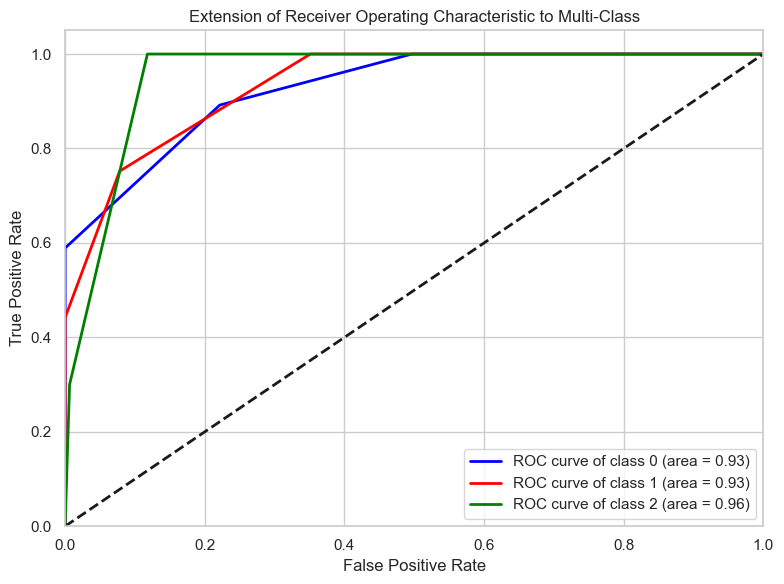

ROC Curve for Test Data


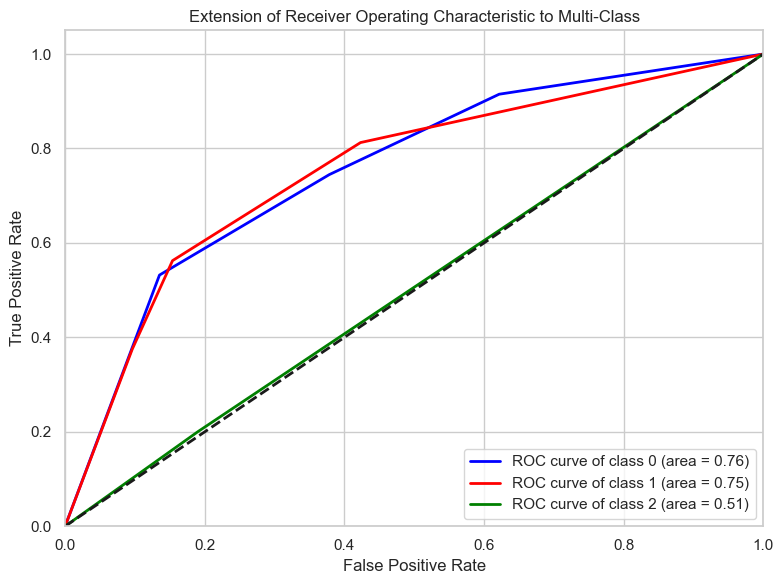

Confusion Matrix for Training Data


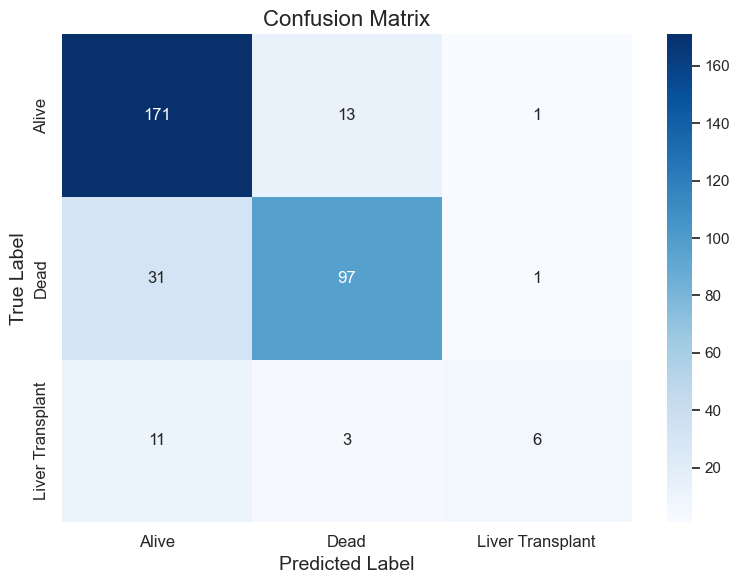

Confusion Matrix for Test Data


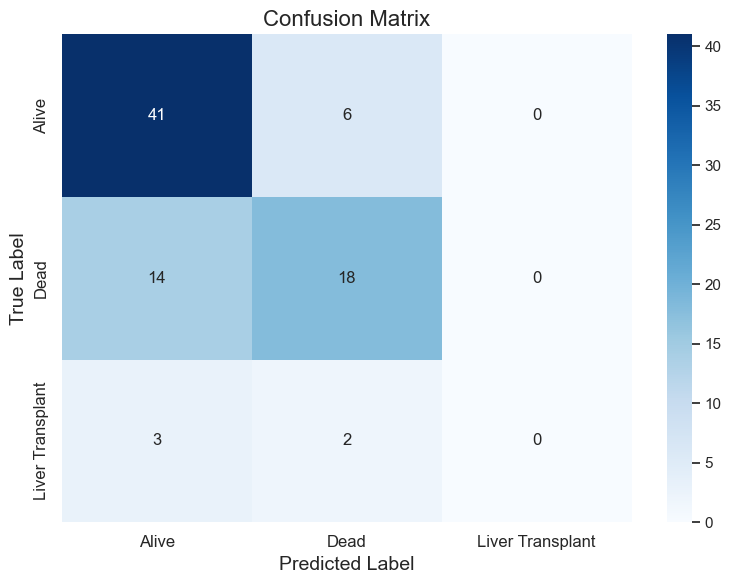

In [31]:
from sklearn.neighbors import KNeighborsClassifier

KNNmodel = KNeighborsClassifier()
KNNData = data.copy()

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 15],
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'minkowski'],
    'leaf_size': [20, 30, 40],          
}

best_params_knn = {'leaf_size': 20, 'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}

KNNModel, train_results, test_results = train_model(KNNmodel, KNNData, params = best_params_knn, use_ordinal_encoding=True, do_oversampling=False, 
                                  do_undersampling=False, n_splits=5, normalize=True, show_results=True)

## DECISION TREE

Hyperparameters set to: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Average Train Cross-Validation Results:
{'accuracy': 0.9401252166135613, 'f1': 0.9376520558688277, 'precision': 0.9412202325212797, 'recall': 0.9401252166135613}
Average Validation Cross-Validation Results:
{'accuracy': 0.6916779737675259, 'f1': 0.6846526190563402, 'precision': 0.6810712385978798, 'recall': 0.6916779737675259}
Train Accuracy: 0.9461077844311377, Train F1 Score: 0.9458057170617528
Train Classification Report:
                  precision    recall  f1-score   support

           Alive       0.96      0.96      0.96       185
            Dead       0.92      0.95      0.94       129
Liver Transplant       0.94      0.80      0.86        20

        accuracy                           0.95       334
       macro avg       0.94      0.90      0.92       334
    weighted avg       0.95      0.95      0.95       334

Train Confusion Matrix:
[[1

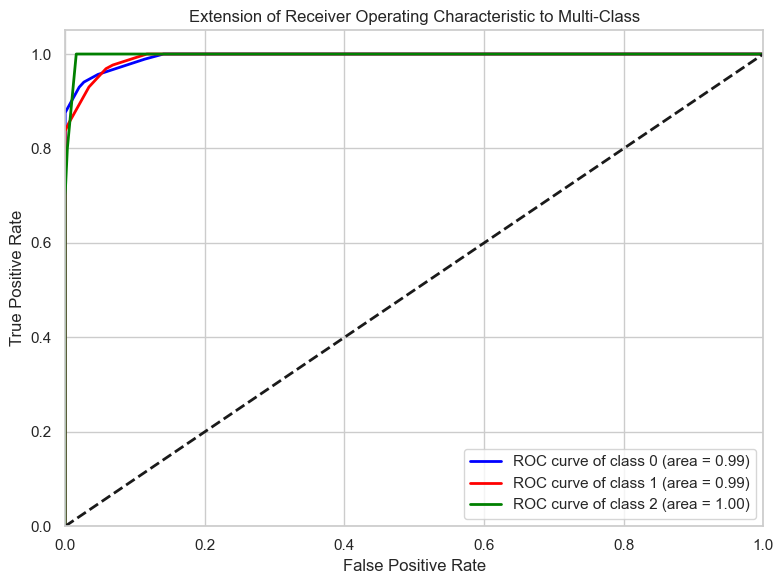

ROC Curve for Test Data


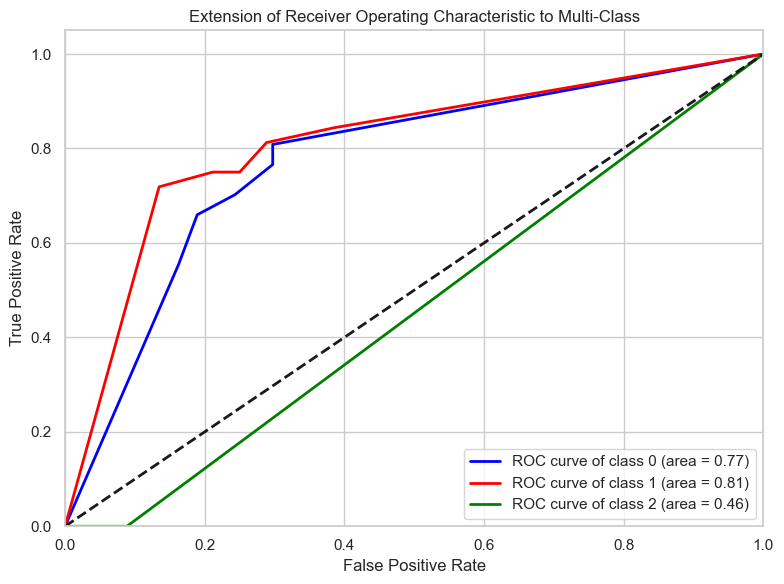

Confusion Matrix for Training Data


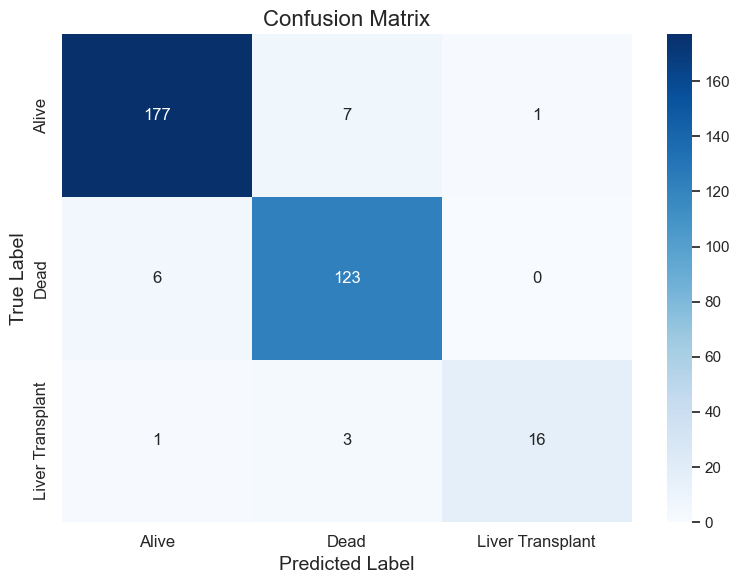

Confusion Matrix for Test Data


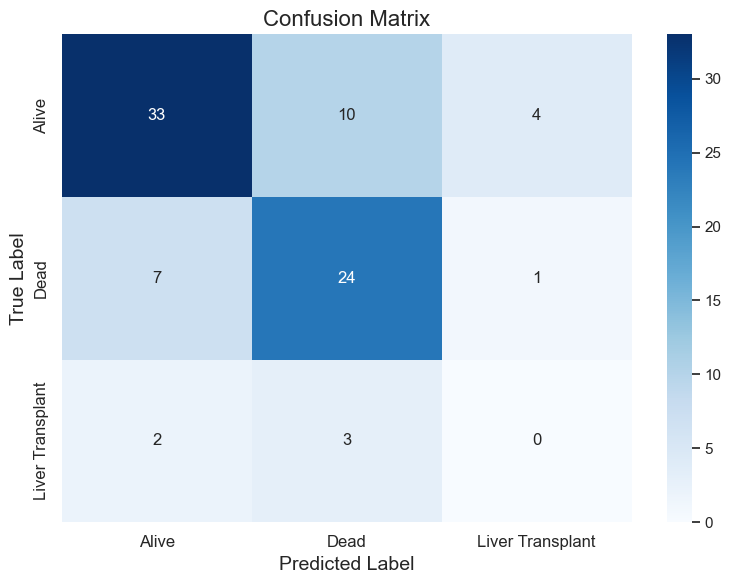

In [32]:
from sklearn.tree import DecisionTreeClassifier

DecisionTreeModel = DecisionTreeClassifier(random_state=42)
DecisiontTreeData = data.copy()

param_grid_decision_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

best_params_decision_tree = {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}

DecisionTreeModel, train_results, test_results = train_model(DecisionTreeModel, DecisiontTreeData, params=best_params_decision_tree,use_ordinal_encoding=True, do_oversampling=False, 
                                  do_undersampling=False, n_splits=5, normalize=True)


## SVM

Hyperparameters set to: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Average Train Cross-Validation Results:
{'accuracy': 0.835978835978836, 'f1': 0.835322586275405, 'precision': 0.8357470685417485, 'recall': 0.835978835978836}
Average Validation Cross-Validation Results:
{'accuracy': 0.6165535956580733, 'f1': 0.6458926805768479, 'precision': 0.7041167508199284, 'recall': 0.6165535956580733}
Train Accuracy: 0.8301486199575372, Train F1 Score: 0.8288989176487842
Train Classification Report:
                  precision    recall  f1-score   support

           Alive       0.77      0.79      0.78       157
            Dead       0.83      0.75      0.79       157
Liver Transplant       0.90      0.95      0.92       157

        accuracy                           0.83       471
       macro avg       0.83      0.83      0.83       471
    weighted avg       0.83      0.83      0.83       471

Train Confusion Matrix:
[[124  21  12]
 [ 34 118   5]
 [  4   4 149]]
Test Accur

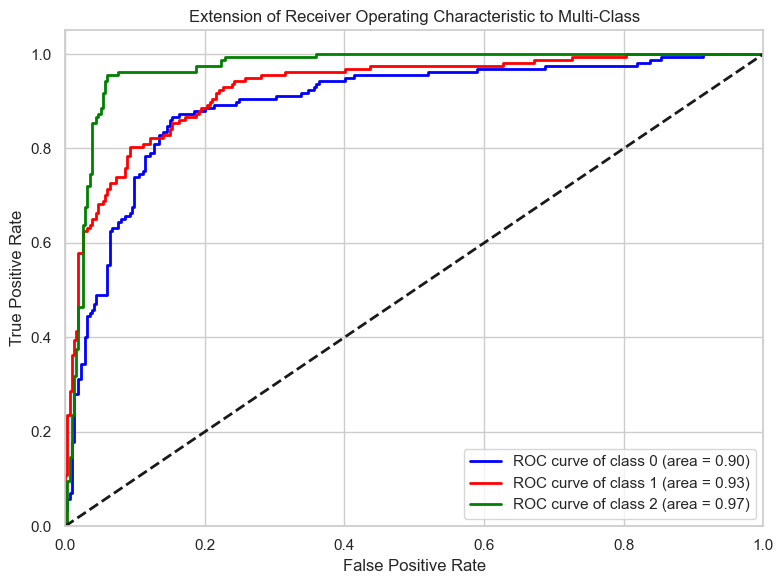

ROC Curve for Test Data


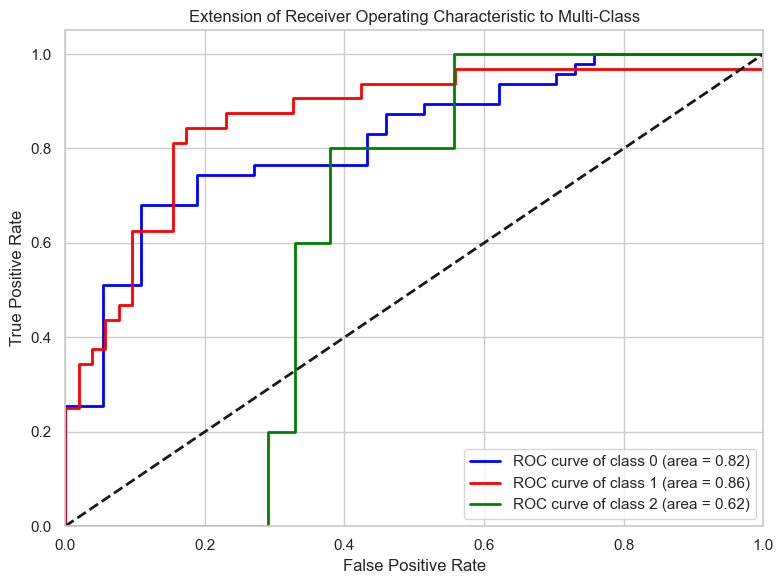

Confusion Matrix for Training Data


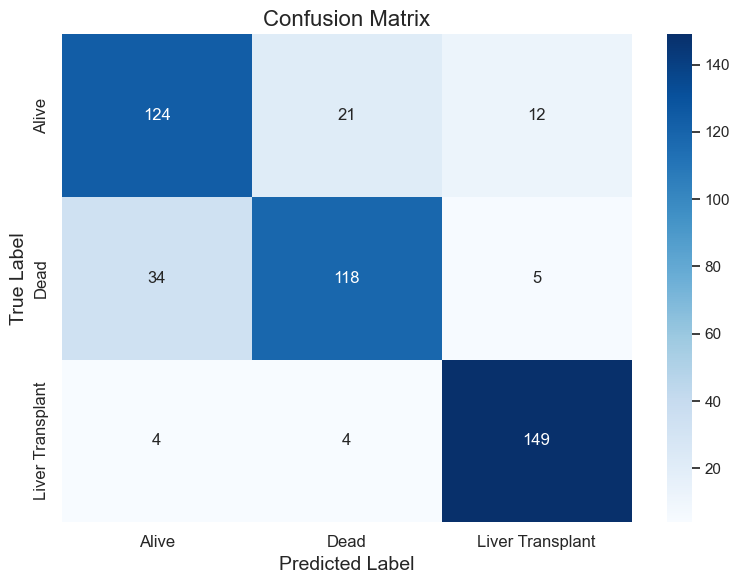

Confusion Matrix for Test Data


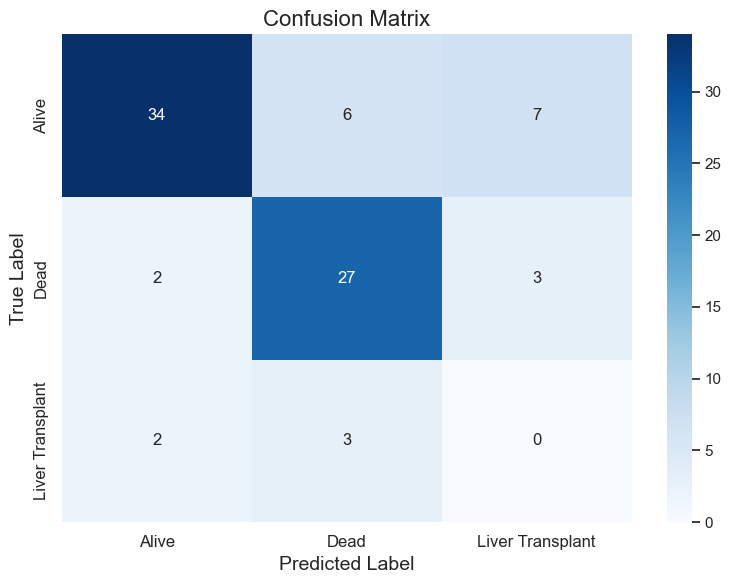

In [33]:
from sklearn.svm import SVC as SVM

SVMModel = SVM(probability=True)
SVMData = data.copy()

param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

best_params_svm = {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}

SVMModel, train_results, test_results = train_model(SVMModel, SVMData, params=best_params_svm, use_ordinal_encoding=True, do_oversampling=True, 
                                  do_undersampling=True, n_splits=5, normalize=True, show_results=True)

# EXTRA MODELS

## RANDOM FOREST

Hyperparameters set to: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Average Train Cross-Validation Results:
{'accuracy': 0.985027111632847, 'f1': 0.984640398110907, 'precision': 0.9852961898223311, 'recall': 0.985027111632847}
Average Validation Cross-Validation Results:
{'accuracy': 0.7303482587064677, 'f1': 0.7054874812083634, 'precision': 0.685379785573603, 'recall': 0.7303482587064677}
Train Accuracy: 0.9880239520958084, Train F1 Score: 0.9876959362920416
Train Classification Report:
                  precision    recall  f1-score   support

           Alive       0.98      1.00      0.99       185
            Dead       0.99      0.99      0.99       129
Liver Transplant       1.00      0.85      0.92        20

        accuracy                           0.99       334
       macro avg       0.99      0.95      0.97       334
    weighted avg       0.99      0.99      0.99       334

Train Confu

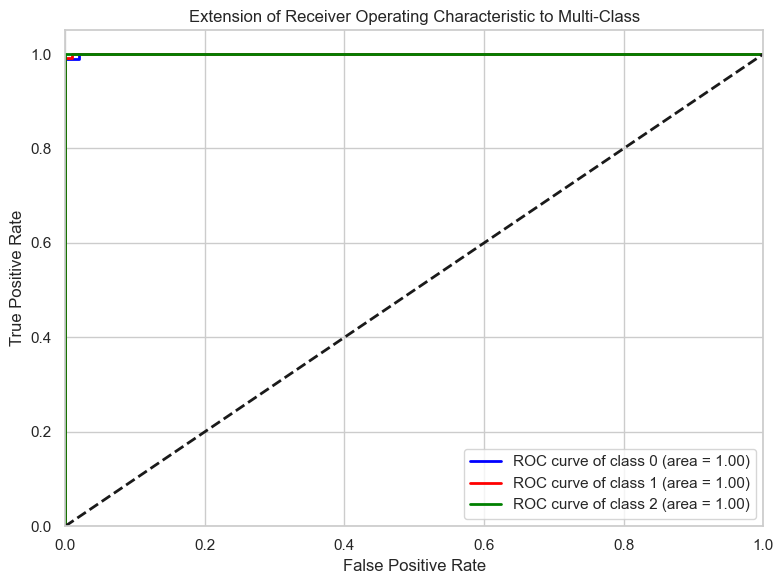

ROC Curve for Test Data


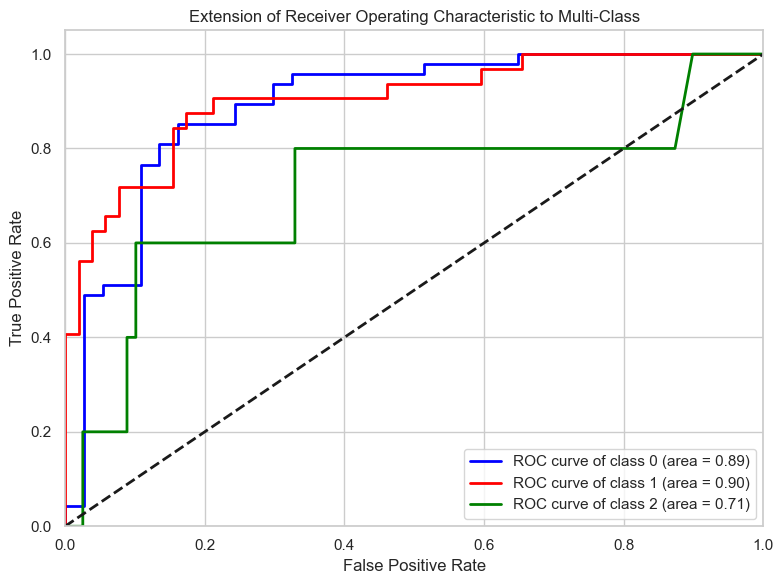

Confusion Matrix for Training Data


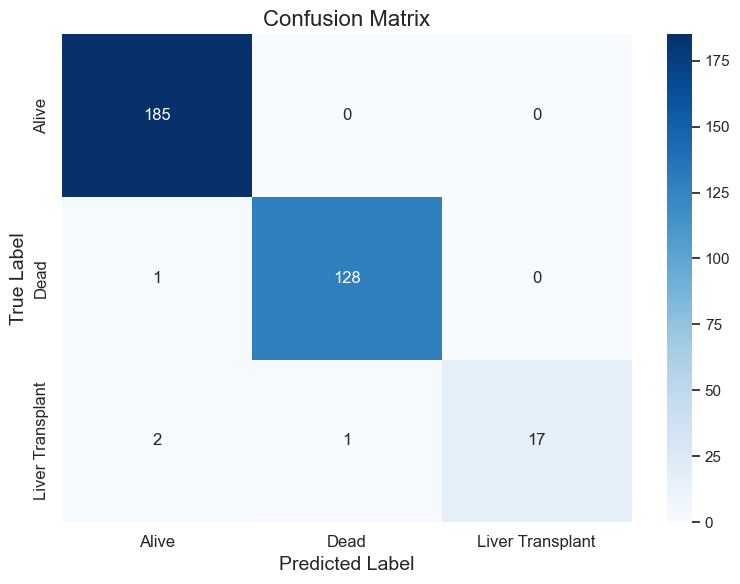

Confusion Matrix for Test Data


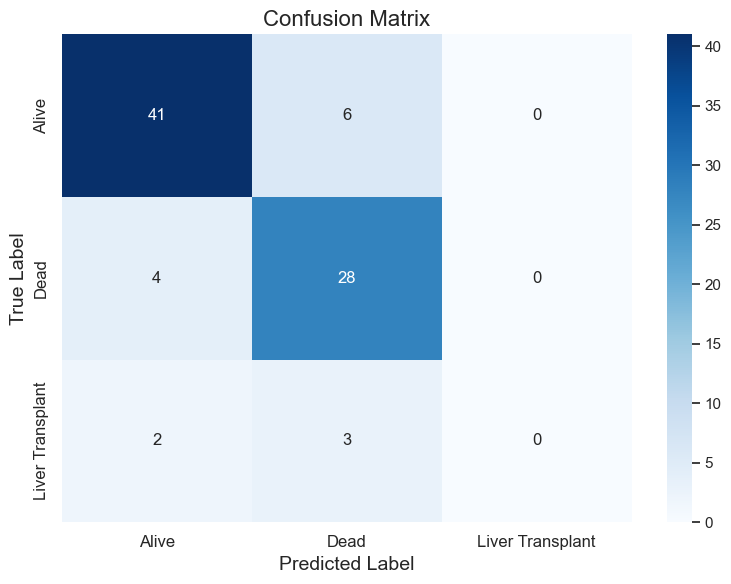

In [34]:
from sklearn.ensemble import RandomForestClassifier


RandomForestModel = RandomForestClassifier(random_state=42)
RandomForestData = data.copy()

param_grid_random_forest = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': [None, 'sqrt', 'log2'],
        'bootstrap': [True, False]
}

best_params_random_forest = {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

model, _,  _ = train_model(RandomForestModel, RandomForestData, params=best_params_random_forest, use_ordinal_encoding=True, do_oversampling=False, 
                                  do_undersampling=False, n_splits=5, normalize=True)

# XGBOOST

 Cross validation: 100.0%
Best parameters in Cross-Validation: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 300, 'subsample': 0.7}, F1 Score: (0.7280858245135012, 0.7425599276345546)
Train Accuracy: 1.0, Train F1 Score: 1.0
Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       185
           1       1.00      1.00      1.00       129
           2       1.00      1.00      1.00        20

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334

Train Confusion Matrix:
[[185   0   0]
 [  0 129   0]
 [  0   0  20]]
Test Accuracy: 0.7738095238095238, Test F1 Score: 0.7505626628760957
Test Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83        47
           1       0.71      0.78      0.75

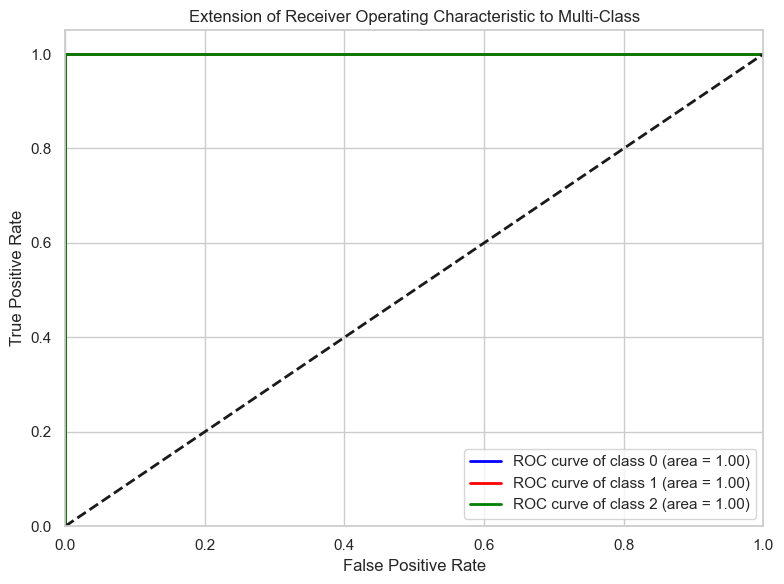

ROC Curve for Test Data


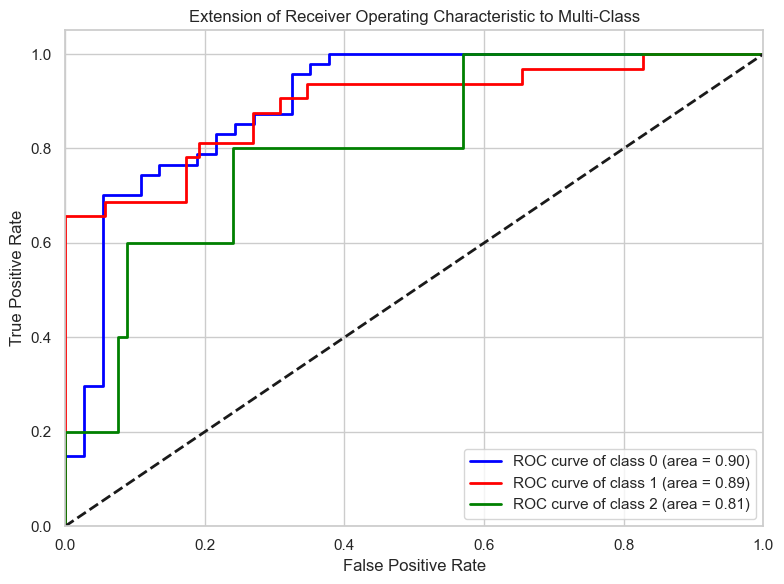

Confusion Matrix for Training Data


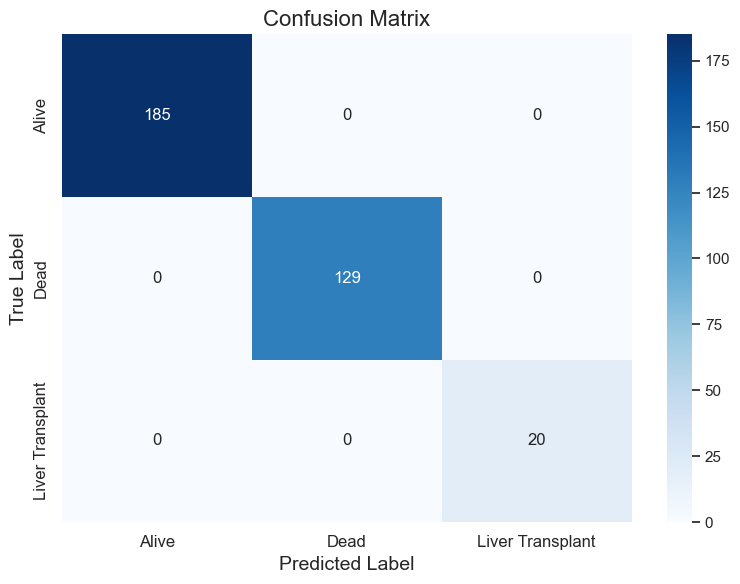

Confusion Matrix for Test Data


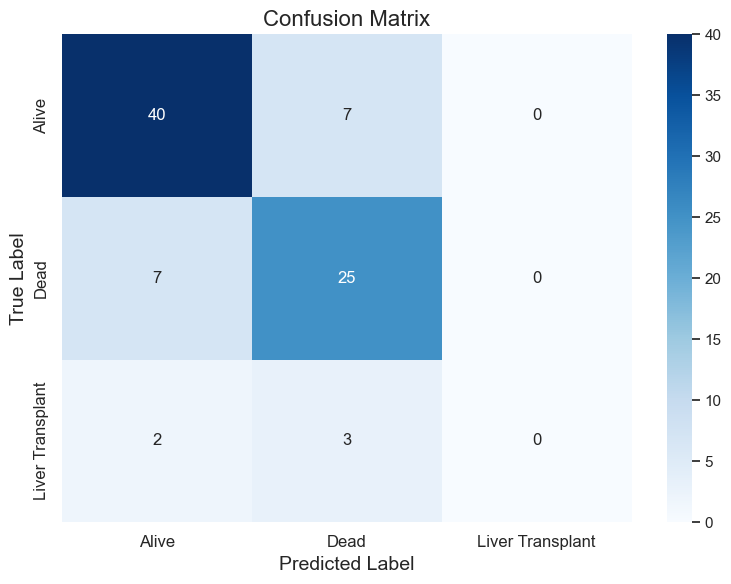

In [35]:
from xgboost import XGBClassifier

XGBModel = XGBClassifier(random_state=42)
XGBData = data.copy()

param_grid_XGB = {
    'n_estimators': [200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [6, 9],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1, 5]
}


XGBModel = train_model(XGBModel, XGBData, param_grid=param_grid_XGB, use_ordinal_encoding=True, do_oversampling=False, 
                                  do_undersampling=False, n_splits=5, normalize=True)

# BONUS

## EBM

Train Accuracy: 0.9880239520958084, Train F1 Score: 0.9876959362920416
Train Classification Report:
                  precision    recall  f1-score   support

           Alive       0.98      1.00      0.99       185
            Dead       0.99      0.99      0.99       129
Liver Transplant       1.00      0.85      0.92        20

        accuracy                           0.99       334
       macro avg       0.99      0.95      0.97       334
    weighted avg       0.99      0.99      0.99       334

Train Confusion Matrix:
[[185   0   0]
 [  1 128   0]
 [  2   1  17]]
Test Accuracy: 0.8214285714285714, Test F1 Score: 0.7972739820565907
Test Classification Report:
                  precision    recall  f1-score   support

           Alive       0.87      0.87      0.87        47
            Dead       0.76      0.88      0.81        32
Liver Transplant       0.00      0.00      0.00         5

        accuracy                           0.82        84
       macro avg       0.54     

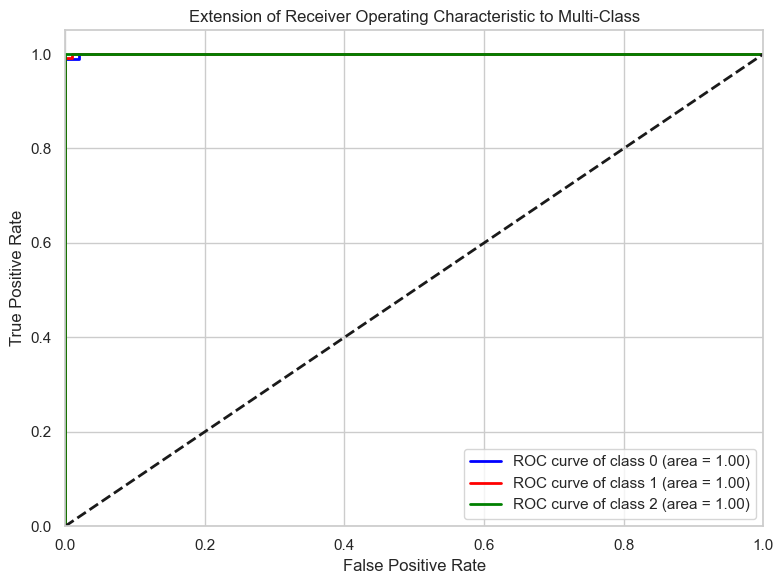

ROC Curve for Test Data


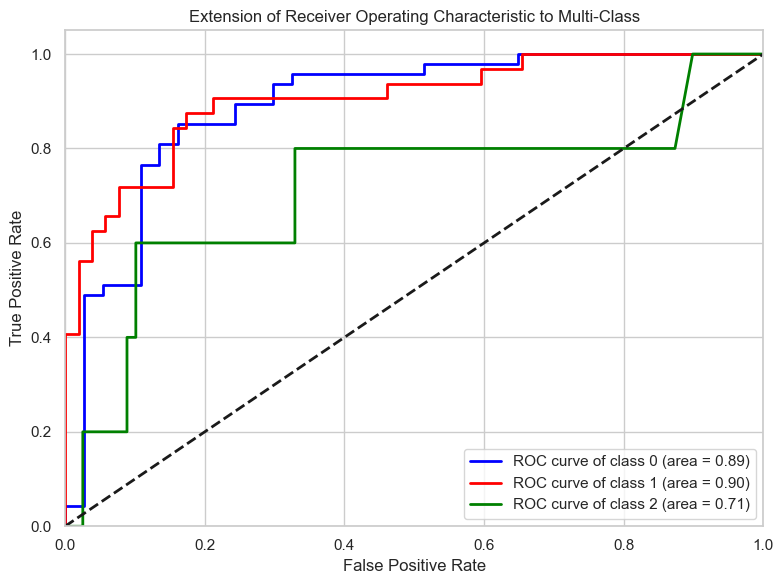

Confusion Matrix for Training Data


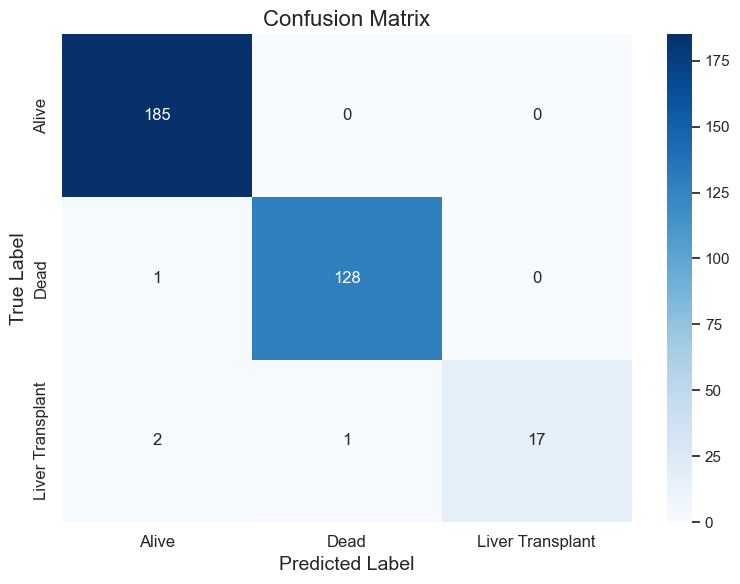

Confusion Matrix for Test Data


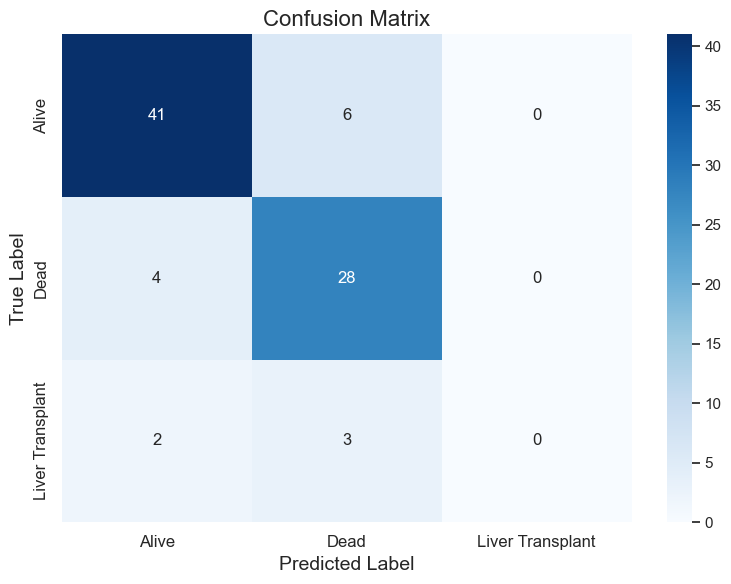

N_Days: 0.1519389406882019
Drug: 0.08081962465534359
Age: 0.1491071830069245
Sex: 0.061312457403634356
Ascites: 0.05575550115954742
Hepatomegaly: 0.1020975548879352
Spiders: 0.058379280495753305
Edema: 0.059878716094857884
Bilirubin: 0.05137809612284761
Cholesterol: 0.045221480636034206
Albumin: 0.09582930627293529
Copper: 0.0037232539777794426
Alk_Phos: 0.0060576224945794
SGOT: 0.01461987578347024
Tryglicerides: 0.022419303958795288
Platelets: 0.0062007604467468995
Prothrombin: 0.013903865297928874
Stage: 0.021357176616684598


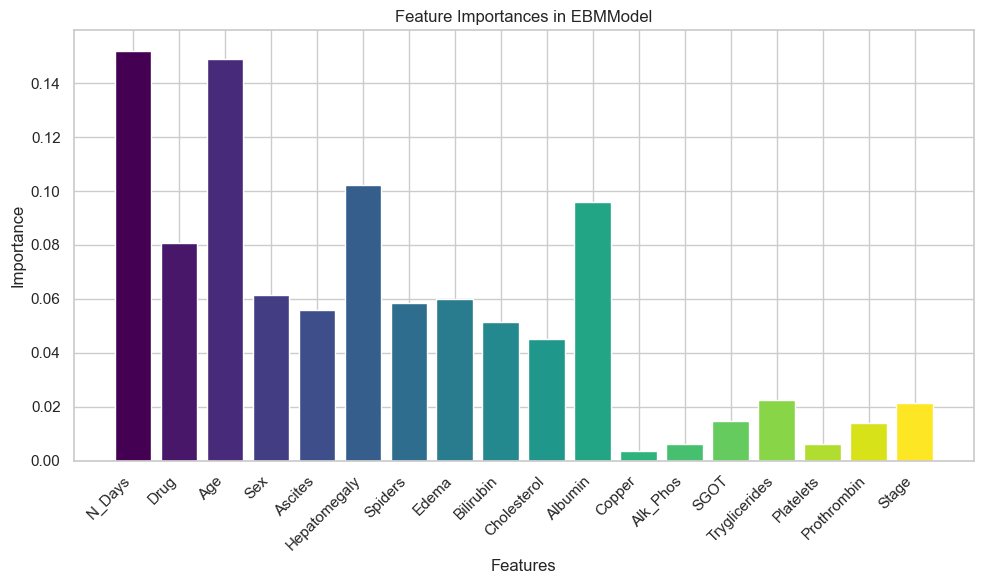

In [36]:
from interpret.glassbox import ExplainableBoostingClassifier
import matplotlib.cm as cm

EBMModel = ExplainableBoostingClassifier(interactions=0)
EBMData = data.copy()

param_grid = {
    "max_bins": [100, 200, 256],  # Número moderado de bins para equilibrar la granularidad y el sobreajuste.
    "learning_rate": [0.01, 0.05, 0.1],  # Rango de tasa de aprendizaje para un equilibrio entre velocidad y precisión.
    "min_samples_leaf": [2, 5, 10],  # Ajuste para el tamaño mínimo de las hojas, importante para prevenir sobreajuste.
    "max_leaves": [2, 3, 5],  # Número de hojas limitado para simplificar el modelo.
    "random_state": [42]  # Semilla para reproducibilidad.
}

best_params = {'learning_rate': 0.1, 'max_bins': 200, 'max_leaves': 5, 'min_samples_leaf': 5, 'random_state': 42}

EBMModel, train_results, test_results = train_model(model, EBMData, use_ordinal_encoding=True, do_oversampling=False,
                                    do_undersampling=False, n_splits=5, normalize=True)

# Get the feature importances from the model
importances = EBMModel.feature_importances_

# Replace this with your actual list of feature names
feature_names = EBMData.columns.tolist()
feature_names.remove('Status')

# Ensure 'feature_names' contains the correct number of feature names
assert len(feature_names) == len(importances), "Number of features and importances must match"

# Printing feature importances
for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance}")

# Creating a color gradient for the bars
colors = cm.viridis(np.linspace(0, 1, len(importances)))

# Creating a bar chart for visualizing the feature importances
plt.figure(figsize=(10, 6))  # Adjust figure size to give more room
plt.bar(feature_names, importances, color=colors)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances in EBMModel')
plt.xticks(rotation=45, ha='right')  # Rotate labels and align for better readability
plt.tight_layout()  # Adjust layout to fit everything neatly
plt.savefig('../images/feature_importances_ebm.png')
plt.show()


# Clustering

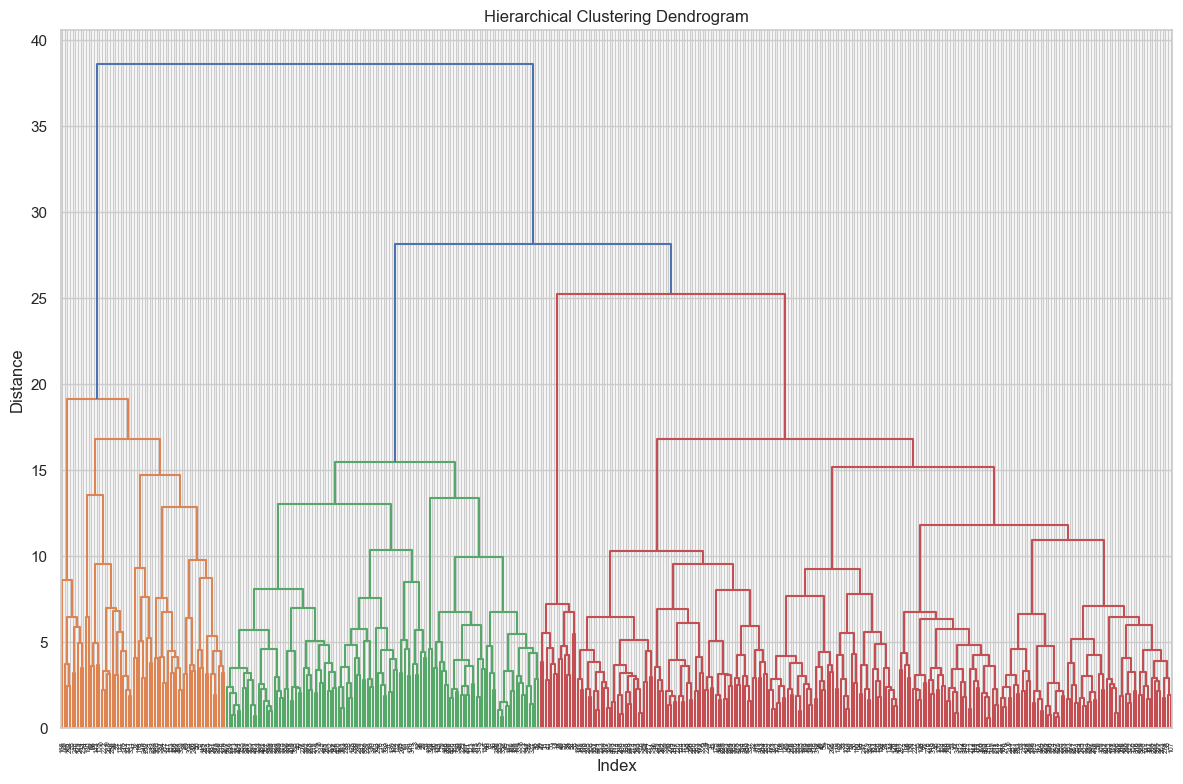

Suggested number of clusters: 4


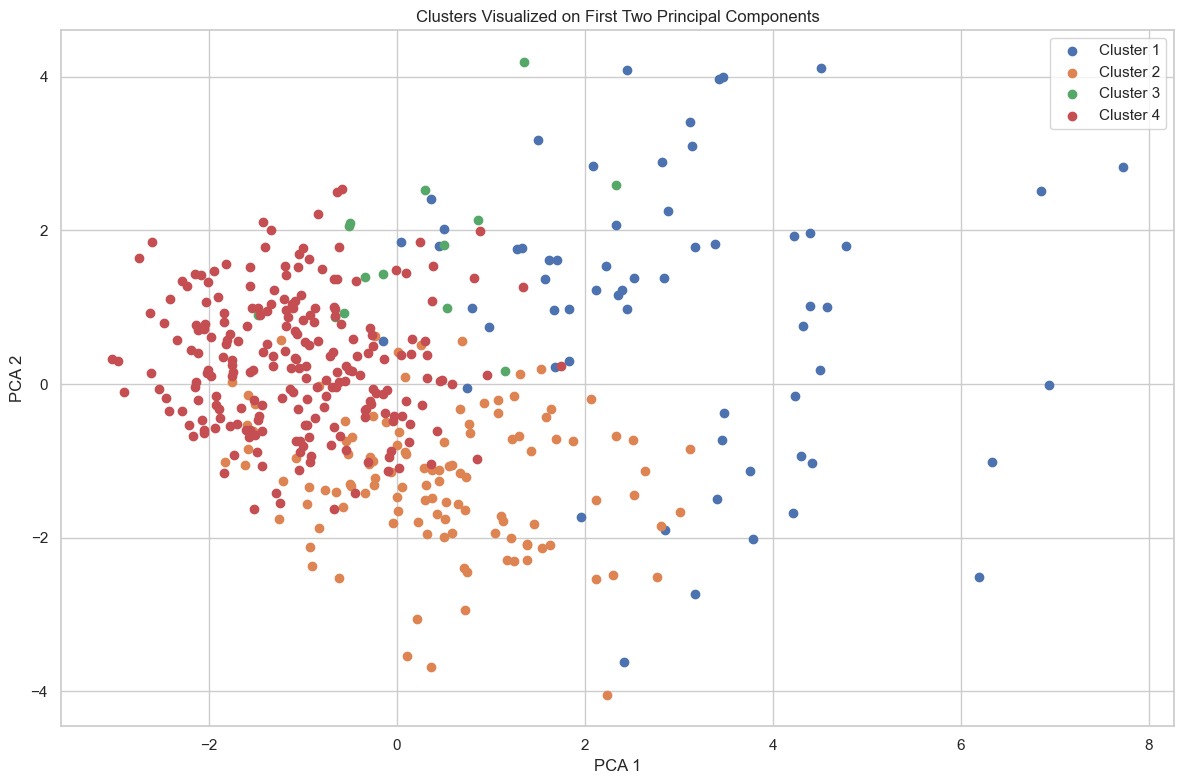

Numeric Variables Statistics by Cluster:
               Cluster1_mean  Cluster1_std  Cluster1_min  Cluster1_max  \
N_Days           1193.790323    964.846971         41.00       4191.00   
Age             18425.677419   3522.908112      11273.00      28650.00   
Bilirubin          10.912903      6.510105          0.90         28.00   
Cholesterol       628.098925    383.392776        175.00       1775.00   
Albumin             3.277097      0.487289          2.10          4.16   
Copper            187.048387    118.896023         34.00        588.00   
Alk_Phos         2309.206667   1240.088716        559.00       6064.80   
SGOT              174.065151     68.286307         60.45        457.25   
Tryglicerides     194.783871     84.827806         55.00        598.00   
Platelets         281.159140    121.430745         62.00        721.00   
Prothrombin        11.102258      1.120124          9.50         15.20   
Cluster             1.000000      0.000000          1.00          1.00 

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt


# Creating a copy of data and removing 'Status'
clustering_data = data.copy()
clustering_data.drop(columns=['Status'], inplace=True)


#Impute the dataset
clustering_data = impute_dataset(clustering_data)

# Separating numeric and categorical columns
numeric_columns = clustering_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = clustering_data.select_dtypes(include=['object', 'category']).columns.tolist()

# Creating a column transformer for scaling and encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(), categorical_columns)])

# Fitting and transforming the data
data_processed = preprocessor.fit_transform(clustering_data)

# Performing hierarchical clustering
Z = linkage(data_processed, 'ward')

# Plotting the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, labels=clustering_data.index)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.tight_layout()
plt.savefig('../images/dendrogram.png')
plt.show()

# Suggerence of the number of clusters using the maximum distance method
max_d = 25
clusters = fcluster(Z, max_d, criterion='distance')
num_clusters = len(np.unique(clusters))
print(f'Suggested number of clusters: {num_clusters}')


# Choose the number of clusters
k = 4
clusters = fcluster(Z, k, criterion='maxclust')

# Append the cluster assignment to your original data
clustering_data['Cluster'] = clusters

# If the number of features is high, you might want to reduce dimensions to visualize in 2D
# Using PCA to reduce the data to two dimensions for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_processed)

# Create a DataFrame of the PCA results
pca_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])

# Add the cluster assignment to the PCA DataFrame
pca_df['Cluster'] = clusters

# Plotting the clusters
plt.figure(figsize=(12, 8))
for i in range(1, k+1):
    plt.scatter(pca_df[pca_df['Cluster'] == i]['PCA1'], pca_df[pca_df['Cluster'] == i]['PCA2'], label=f'Cluster {i}')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clusters Visualized on First Two Principal Components')
plt.legend()
plt.tight_layout()
plt.savefig('../images/clusters.png')
plt.show()


# Performing profiling of the clusters

# Create empty DataFrames for numeric and categorical statistics
stats_numeric = pd.DataFrame()
stats_categorical = pd.DataFrame()

# Loop through each cluster to calculate statistics
for i in range(1, k+1):
    cluster_data = clustering_data[clustering_data['Cluster'] == i]

    # Numeric variables: Calculate descriptive statistics
    # We include mean, standard deviation, min and max for a comprehensive overview.
    numeric_summary = cluster_data.describe().transpose()
    stats_numeric[f'Cluster{i}_mean'] = numeric_summary['mean']
    stats_numeric[f'Cluster{i}_std'] = numeric_summary['std']
    stats_numeric[f'Cluster{i}_min'] = numeric_summary['min']
    stats_numeric[f'Cluster{i}_max'] = numeric_summary['max']

    # Categorical variables: Calculate the mode and frequency
    # Mode (top) and frequency (freq) are useful to understand the most common category 
    # and its occurrence within each cluster.
    categorical_summary = cluster_data.describe(include=['category']).transpose()
    stats_categorical[f'Cluster{i}_mode'] = categorical_summary['top']
    stats_categorical[f'Cluster{i}_freq'] = categorical_summary['freq']
    stats_categorical[f'Cluster{i}_majority'] = categorical_summary['freq'] / categorical_summary['count']

# Display the statistics for numeric and categorical variables
print("Numeric Variables Statistics by Cluster:")
print(stats_numeric)
print("\nCategorical Variables Statistics by Cluster:")
print(stats_categorical)
